In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


In [2]:
#Sql query 
engine = create_engine("sqlite:///mta_data.db")
df = pd.read_sql("SELECT * FROM mta_data", engine)

In [3]:
# Checking Dataframe's first 5 rows:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,03:00:00,REGULAR,7672966,2645023
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270


In [4]:
# Checking the dataframe size:
df.shape

(2732603, 11)

In [5]:
# Checking general info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732603 entries, 0 to 2732602
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 229.3+ MB


In [6]:
#Checking basic descriptive statistics 
df.describe()

,ENTRIES,EXITS
count,2.732603e+06,2.732603e+06
mean,4.201794e+07,3.386391e+07
std,2.204692e+08,1.945824e+08
min,0.000000e+00,0.000000e+00
25%,2.330550e+05,1.144150e+05
50%,1.369239e+06,8.555220e+05
75%,6.007727e+06,3.992825e+06
max,2.147375e+09,2.122704e+09


## Data Cleaning:

In [7]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [8]:
df.columns = [column.strip().lower().replace('/','_') for column in df.columns] #formatting column names
df.head()

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,03:00:00,REGULAR,7672966,2645023
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270


In [9]:
# Turn the dataframe into a time series
df["date_time"] = pd.to_datetime(df.date + " " + df.time, format="%m/%d/%Y %H:%M:%S")
df.head()

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,03:00:00,REGULAR,7672966,2645023,2021-12-18 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040,2021-12-18 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127,2021-12-18 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193,2021-12-18 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270,2021-12-18 19:00:00


In [10]:
# Sanity Check to verify that "c_a", "unit", "scp", "station", "date_time" is unique
(df
 .groupby(["c_a", "unit", "scp", "station", "date_time"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).head(5)

,c_a,unit,scp,station,date_time,entries
405945,G001,R151,00-05-01,CONEY IS-STILLW,2021-11-08 00:00:00,2
2710700,S101,R070,00-00-02,ST. GEORGE,2021-10-02 00:00:00,2
2710688,S101,R070,00-00-02,ST. GEORGE,2021-09-30 00:00:00,2
2710714,S101,R070,00-00-02,ST. GEORGE,2021-10-04 08:00:00,2
2710691,S101,R070,00-00-02,ST. GEORGE,2021-09-30 12:00:00,2


In [11]:
# Get rid of the duplicate entry
df.sort_values(["c_a", "unit", "scp", "station", "date_time"], inplace=True, ascending=False)
df.drop_duplicates(subset=["c_a", "unit", "scp", "station", "date_time"], inplace=True)


In [12]:
df.head()

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
210382,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/24/2021,20:00:00,REGULAR,5562,994,2021-12-24 20:00:00
210381,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/24/2021,16:00:00,REGULAR,5562,994,2021-12-24 16:00:00
210380,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/24/2021,12:00:00,REGULAR,5562,979,2021-12-24 12:00:00
210379,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/24/2021,08:00:00,REGULAR,5562,979,2021-12-24 08:00:00
210378,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/24/2021,04:00:00,REGULAR,5562,979,2021-12-24 04:00:00


In [13]:
# Sanity Check to verify that "c_a", "unit", "scp", "station", "date_time" is unique
(df.groupby(["c_a", "unit", "scp", "station", "date_time"]).entries.count().reset_index().sort_values("entries", ascending=False)).head(5)



,c_a,unit,scp,station,date_time,entries
0,A002,R051,02-00-00,59 ST,2021-09-25 00:00:00,1
1821692,R141,R031,00-03-02,34 ST-PENN STA,2021-12-21 15:00:00,1
1821694,R141,R031,00-03-02,34 ST-PENN STA,2021-12-21 23:00:00,1
1821695,R141,R031,00-03-02,34 ST-PENN STA,2021-12-22 03:00:00,1
1821696,R141,R031,00-03-02,34 ST-PENN STA,2021-12-22 07:00:00,1


No more duplicate Entries

In [14]:
#Checking for null values based on column
df.isnull().sum()

c_a          0
unit         0
scp          0
station      0
linename     0
division     0
date         0
time         0
desc         0
entries      0
exits        0
date_time    0
dtype: int64

No null values

In [15]:
df.describe()

,entries,exits
count,2.732548e+06,2.732548e+06
mean,4.201876e+07,3.386458e+07
std,2.204713e+08,1.945843e+08
min,0.000000e+00,0.000000e+00
25%,2.330550e+05,1.144300e+05
50%,1.369321e+06,8.555615e+05
75%,6.007816e+06,3.993015e+06
max,2.147375e+09,2.122704e+09


## Dataframe for train stations with Borough names (df2):


In [16]:
#Different dfs for train stations:
df_train_stops = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')
df_train_stops.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Notes
0,1,1,R01,BMT,Astoria,Astoria-Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan,0,NaN
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan,1,NaN
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan,0,NaN
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan,0,NaN
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan,0,NaN


In [17]:
len(df_train_stops['Stop Name'].unique())

379

In [18]:
len(df['station'].unique())

379

In [19]:

df_train_stops.Borough.unique()

array(['Q', 'M', 'Bk', 'Bx', 'SI'], dtype=object)

## Looking for Bronx and Brooklyn Boroughs and formatting them:

In [20]:
Bronx_df = df_train_stops[df_train_stops["Borough"] == "Bx"]
Bronx_df.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Notes
210,210,210,D01,IND,Concourse,Norwood-205 St,Bx,D,Subway,40.874811,-73.878855,NaN,Manhattan,0,NaN
211,211,211,D03,IND,Concourse,Bedford Park Blvd,Bx,B D,Subway,40.873244,-73.887138,Norwood - 205 St,Manhattan,1,NaN
212,212,212,D04,IND,Concourse,Kingsbridge Rd,Bx,B D,Subway,40.866978,-73.893509,Bedford Pk Blvd & 205 St,Manhattan,1,NaN
213,213,213,D05,IND,Concourse,Fordham Rd,Bx,B D,Subway,40.861296,-73.897749,Bedford Pk Blvd & 205 St,Manhattan,0,NaN
214,214,214,D06,IND,Concourse,182-183 Sts,Bx,B D,Subway,40.856093,-73.900741,Bedford Pk Blvd & 205 St,Manhattan,0,NaN


In [21]:
len(Bronx_df["Stop Name"].unique())

62

In [22]:
Brooklyn_df = df_train_stops[df_train_stops["Borough"] == "Bk"]
Brooklyn_df.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Notes
23,24,620,R28,BMT,Broadway,Court St,Bk,R,Subway,40.694100,-73.991777,Manhattan,Bay Ridge - 95 St,0,NaN
24,25,636,R29,BMT,Broadway,Jay St-MetroTech,Bk,R,Subway,40.692180,-73.985942,Manhattan,Bay Ridge - 95 St,1,NaN
25,26,26,R30,BMT,Broadway - Brighton,DeKalb Av,Bk,B Q R,Subway,40.690635,-73.981824,Manhattan,Coney Island - Bay Ridge,1,NaN
26,27,617,R31,BMT,4th Av,Atlantic Av-Barclays Ctr,Bk,D N R,Subway,40.683666,-73.978810,Manhattan,Coney Island - Bay Ridge,1,NaN
27,28,28,R32,BMT,4th Av,Union St,Bk,R,Subway,40.677316,-73.983110,Manhattan,Bay Ridge - 95 St,0,NaN


In [23]:
#Converting all the station names to lower case
df['station'] = df['station'].str.lower()

In [24]:
#Formating column names for Bronx dataframe
Bronx_df.columns = [column.strip().lower() for column in Bronx_df.columns] #formatting column names
Bronx_df.head()

,station id,complex id,gtfs stop id,division,line,stop name,borough,daytime routes,structure,gtfs latitude,gtfs longitude,north direction label,south direction label,ada,ada notes
210,210,210,D01,IND,Concourse,Norwood-205 St,Bx,D,Subway,40.874811,-73.878855,NaN,Manhattan,0,NaN
211,211,211,D03,IND,Concourse,Bedford Park Blvd,Bx,B D,Subway,40.873244,-73.887138,Norwood - 205 St,Manhattan,1,NaN
212,212,212,D04,IND,Concourse,Kingsbridge Rd,Bx,B D,Subway,40.866978,-73.893509,Bedford Pk Blvd & 205 St,Manhattan,1,NaN
213,213,213,D05,IND,Concourse,Fordham Rd,Bx,B D,Subway,40.861296,-73.897749,Bedford Pk Blvd & 205 St,Manhattan,0,NaN
214,214,214,D06,IND,Concourse,182-183 Sts,Bx,B D,Subway,40.856093,-73.900741,Bedford Pk Blvd & 205 St,Manhattan,0,NaN


In [25]:
#Converting all the stop  names to lower case
Bronx_df['stop name'] = Bronx_df['stop name'].str.lower()
Bronx_df.head()


/var/folders/p5/5cz9q1c15pn6hbl2m1csrmjh0000gn/T/ipykernel_2689/2578302608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bronx_df['stop name'] = Bronx_df['stop name'].str.lower()


,station id,complex id,gtfs stop id,division,line,stop name,borough,daytime routes,structure,gtfs latitude,gtfs longitude,north direction label,south direction label,ada,ada notes
210,210,210,D01,IND,Concourse,norwood-205 st,Bx,D,Subway,40.874811,-73.878855,NaN,Manhattan,0,NaN
211,211,211,D03,IND,Concourse,bedford park blvd,Bx,B D,Subway,40.873244,-73.887138,Norwood - 205 St,Manhattan,1,NaN
212,212,212,D04,IND,Concourse,kingsbridge rd,Bx,B D,Subway,40.866978,-73.893509,Bedford Pk Blvd & 205 St,Manhattan,1,NaN
213,213,213,D05,IND,Concourse,fordham rd,Bx,B D,Subway,40.861296,-73.897749,Bedford Pk Blvd & 205 St,Manhattan,0,NaN
214,214,214,D06,IND,Concourse,182-183 sts,Bx,B D,Subway,40.856093,-73.900741,Bedford Pk Blvd & 205 St,Manhattan,0,NaN


In [26]:
#Formating column names for Brooklyn dataframe
Brooklyn_df.columns = [column.strip().lower() for column in Brooklyn_df.columns] #formatting column names
Brooklyn_df.head()

,station id,complex id,gtfs stop id,division,line,stop name,borough,daytime routes,structure,gtfs latitude,gtfs longitude,north direction label,south direction label,ada,ada notes
23,24,620,R28,BMT,Broadway,Court St,Bk,R,Subway,40.694100,-73.991777,Manhattan,Bay Ridge - 95 St,0,NaN
24,25,636,R29,BMT,Broadway,Jay St-MetroTech,Bk,R,Subway,40.692180,-73.985942,Manhattan,Bay Ridge - 95 St,1,NaN
25,26,26,R30,BMT,Broadway - Brighton,DeKalb Av,Bk,B Q R,Subway,40.690635,-73.981824,Manhattan,Coney Island - Bay Ridge,1,NaN
26,27,617,R31,BMT,4th Av,Atlantic Av-Barclays Ctr,Bk,D N R,Subway,40.683666,-73.978810,Manhattan,Coney Island - Bay Ridge,1,NaN
27,28,28,R32,BMT,4th Av,Union St,Bk,R,Subway,40.677316,-73.983110,Manhattan,Bay Ridge - 95 St,0,NaN


In [27]:
#Converting all the stop  names to lower case
Brooklyn_df['stop name'] = Brooklyn_df['stop name'].str.lower()
Brooklyn_df.head()

/var/folders/p5/5cz9q1c15pn6hbl2m1csrmjh0000gn/T/ipykernel_2689/3066379176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Brooklyn_df['stop name'] = Brooklyn_df['stop name'].str.lower()


,station id,complex id,gtfs stop id,division,line,stop name,borough,daytime routes,structure,gtfs latitude,gtfs longitude,north direction label,south direction label,ada,ada notes
23,24,620,R28,BMT,Broadway,court st,Bk,R,Subway,40.694100,-73.991777,Manhattan,Bay Ridge - 95 St,0,NaN
24,25,636,R29,BMT,Broadway,jay st-metrotech,Bk,R,Subway,40.692180,-73.985942,Manhattan,Bay Ridge - 95 St,1,NaN
25,26,26,R30,BMT,Broadway - Brighton,dekalb av,Bk,B Q R,Subway,40.690635,-73.981824,Manhattan,Coney Island - Bay Ridge,1,NaN
26,27,617,R31,BMT,4th Av,atlantic av-barclays ctr,Bk,D N R,Subway,40.683666,-73.978810,Manhattan,Coney Island - Bay Ridge,1,NaN
27,28,28,R32,BMT,4th Av,union st,Bk,R,Subway,40.677316,-73.983110,Manhattan,Bay Ridge - 95 St,0,NaN


In [28]:
df.station.unique()

array(['rit-roosevelt', 'rit-manhattan', 'tompkinsville', 'st. george',
       'eastchster/dyre', 'baychester av', 'gun hill rd', 'pelham pkwy',
       'morris park', 'flatbush av-b.c', 'newkirk av', 'beverly rd',
       'church av', 'winthrop st', 'sterling st', 'president st',
       'new lots av', 'van siclen av', 'pennsylvania av', 'junius st',
       'rockaway av', 'saratoga av', 'sutter av-rutld', 'crown hts-utica',
       'kingston av', 'nostrand av', 'franklin av', 'eastn pkwy-musm',
       'grand army plaz', 'bergen st', 'atl av-barclay', 'nevins st',
       'hoyt st', 'borough hall', 'clark st', '34 st-hudson yd',
       'flushing-main', 'mets-willets pt', '111 st', '103 st-corona',
       'junction blvd', '90 st-elmhurst', '82 st-jackson h',
       '74 st-broadway', '69 st', '61 st woodside', '52 st',
       '46 st bliss st', '40 st lowery st', '33 st-rawson st',
       'astoria ditmars', 'astoria blvd', '30 av', 'broadway', '36 av',
       '39 av', 'queensboro plz', 'court 

In [29]:
Bronx_df["stop name"].unique()

array(['norwood-205 st', 'bedford park blvd', 'kingsbridge rd',
       'fordham rd', '182-183 sts', 'tremont av', '174-175 sts', '170 st',
       '167 st', '161 st-yankee stadium', 'van cortlandt park-242 st',
       '238 st', '231 st', 'pelham bay park', 'buhre av', 'middletown rd',
       'westchester sq-e tremont av', 'zerega av', 'castle hill av',
       'parkchester', 'st lawrence av', 'morrison av-soundview',
       'elder av', 'whitlock av', 'hunts point av', 'longwood av',
       'e 149 st', "e 143 st-st mary's st", 'cypress av', 'brook av',
       '3 av-138 st', 'woodlawn', 'mosholu pkwy',
       'bedford park blvd-lehman college', '183 st', 'burnside av',
       '176 st', 'mt eden av', '149 st-grand concourse',
       '138 st-grand concourse', 'wakefield-241 st', 'nereid av',
       '233 st', '225 st', '219 st', 'gun hill rd', 'burke av',
       'allerton av', 'pelham pkwy', 'bronx park east', 'e 180 st',
       'west farms sq-e tremont av', '174 st', 'freeman st', 'simpson s

In [30]:
df[df["station"]== "morris park"] 

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
207826,R726,R329,00-00-02,morris park,5,IRT,12/24/2021,20:00:00,REGULAR,6559080,1590163,2021-12-24 20:00:00
207825,R726,R329,00-00-02,morris park,5,IRT,12/24/2021,16:00:00,REGULAR,6559055,1590126,2021-12-24 16:00:00
207824,R726,R329,00-00-02,morris park,5,IRT,12/24/2021,12:00:00,REGULAR,6559018,1590101,2021-12-24 12:00:00
207823,R726,R329,00-00-02,morris park,5,IRT,12/24/2021,08:00:00,REGULAR,6558961,1590088,2021-12-24 08:00:00
207822,R726,R329,00-00-02,morris park,5,IRT,12/24/2021,04:00:00,REGULAR,6558907,1590080,2021-12-24 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2729936,R726,R329,00-00-00,morris park,5,IRT,09/25/2021,17:00:00,REGULAR,1180861,4294989,2021-09-25 17:00:00
2729935,R726,R329,00-00-00,morris park,5,IRT,09/25/2021,13:00:00,REGULAR,1180826,4294840,2021-09-25 13:00:00
2729934,R726,R329,00-00-00,morris park,5,IRT,09/25/2021,09:00:00,REGULAR,1180780,4294767,2021-09-25 09:00:00
2729933,R726,R329,00-00-00,morris park,5,IRT,09/25/2021,05:00:00,REGULAR,1180752,4294732,2021-09-25 05:00:00


In [31]:
# Rename the stop name column to station
Bronx_df = Bronx_df.rename(columns={'stop name': 'station'})
Bronx_df.head(1)

,station id,complex id,gtfs stop id,division,line,station,borough,daytime routes,structure,gtfs latitude,gtfs longitude,north direction label,south direction label,ada,ada notes
210,210,210,D01,IND,Concourse,norwood-205 st,Bx,D,Subway,40.874811,-73.878855,NaN,Manhattan,0,NaN


## Merging MTA dataframe with Bronx_df and Brooklyn_df:

In [32]:
#Merge Mta and Bronx_df
merge_mta_Bronx = pd.merge(df,Bronx_df, on=['station'], how='inner')
merge_mta_Bronx.columns


Index(['c_a', 'unit', 'scp', 'station', 'linename', 'division_x', 'date',
       'time', 'desc', 'entries', 'exits', 'date_time', 'station id',
       'complex id', 'gtfs stop id', 'division_y', 'line', 'borough',
       'daytime routes', 'structure', 'gtfs latitude', 'gtfs longitude',
       'north direction label', 'south direction label', 'ada', 'ada notes'],
      dtype='object')

In [33]:
merge_mta_Bronx.drop(['station id', 'complex id','gtfs stop id','division_y',
                      'line','structure', 'north direction label',
                     'south direction label', 'ada', 'ada notes','daytime routes','gtfs latitude','gtfs longitude'], axis = 1,inplace=True)

In [34]:
#checking for duplicate values
boolean = merge_mta_Bronx.duplicated().any()
boolean


True

In [35]:
# Rename the stop name column to station
Brooklyn_df = Brooklyn_df.rename(columns={'stop name': 'station'})
Brooklyn_df.head(1)

,station id,complex id,gtfs stop id,division,line,station,borough,daytime routes,structure,gtfs latitude,gtfs longitude,north direction label,south direction label,ada,ada notes
23,24,620,R28,BMT,Broadway,court st,Bk,R,Subway,40.6941,-73.991777,Manhattan,Bay Ridge - 95 St,0,NaN


In [36]:
#Merge Mta and Brooklyn_df
merge_mta_Brooklyn = pd.merge(df,Brooklyn_df, on=['station'], how='inner')
merge_mta_Brooklyn.columns

Index(['c_a', 'unit', 'scp', 'station', 'linename', 'division_x', 'date',
       'time', 'desc', 'entries', 'exits', 'date_time', 'station id',
       'complex id', 'gtfs stop id', 'division_y', 'line', 'borough',
       'daytime routes', 'structure', 'gtfs latitude', 'gtfs longitude',
       'north direction label', 'south direction label', 'ada', 'ada notes'],
      dtype='object')

In [37]:
merge_mta_Brooklyn.drop(['station id', 'complex id','gtfs stop id','division_y',
                      'line','structure', 'north direction label',
                     'south direction label', 'ada', 'ada notes','daytime routes','gtfs latitude','gtfs longitude'], axis = 1, inplace=True)

In [38]:
#Checking for duplicate values
boolean = merge_mta_Brooklyn.duplicated().any()
boolean

True

In [39]:
#Finding maximum and minimum date in merge_mta_Bronx dataframe

print("Maximum date: ")
print(merge_mta_Bronx["date_time"].max())
print()
print("Minimum date: ")
print(merge_mta_Bronx["date_time"].min())



Maximum date: 
2021-12-24 23:00:00

Minimum date: 
2021-09-25 00:00:00


## Working with Bronx dataframe:

In [40]:
# Adding "TURNSTILE" columns that concatenate 'C/A', 'UNIT', 'SCP'

merge_mta_Bronx["turnstile"] = merge_mta_Bronx["c_a"]+"-"+merge_mta_Bronx["unit"]+"-"+merge_mta_Bronx["scp"]

merge_mta_Bronx.head(10)


,c_a,unit,scp,station,linename,division_x,date,time,desc,entries,exits,date_time,borough,turnstile
0,R729,R292,00-00-02,baychester av,5,IRT,12/24/2021,20:00:00,REGULAR,2064142564,167940229,2021-12-24 20:00:00,Bx,R729-R292-00-00-02
1,R729,R292,00-00-02,baychester av,5,IRT,12/24/2021,16:00:00,REGULAR,2064142516,167940205,2021-12-24 16:00:00,Bx,R729-R292-00-00-02
2,R729,R292,00-00-02,baychester av,5,IRT,12/24/2021,12:00:00,REGULAR,2064142443,167940180,2021-12-24 12:00:00,Bx,R729-R292-00-00-02
3,R729,R292,00-00-02,baychester av,5,IRT,12/24/2021,08:00:00,REGULAR,2064142374,167940151,2021-12-24 08:00:00,Bx,R729-R292-00-00-02
4,R729,R292,00-00-02,baychester av,5,IRT,12/24/2021,04:00:00,REGULAR,2064142324,167940127,2021-12-24 04:00:00,Bx,R729-R292-00-00-02
5,R729,R292,00-00-02,baychester av,5,IRT,12/24/2021,00:00:00,REGULAR,2064142324,167940126,2021-12-24 00:00:00,Bx,R729-R292-00-00-02
6,R729,R292,00-00-02,baychester av,5,IRT,12/23/2021,20:00:00,REGULAR,2064142311,167940108,2021-12-23 20:00:00,Bx,R729-R292-00-00-02
7,R729,R292,00-00-02,baychester av,5,IRT,12/23/2021,16:00:00,REGULAR,2064142251,167940054,2021-12-23 16:00:00,Bx,R729-R292-00-00-02
8,R729,R292,00-00-02,baychester av,5,IRT,12/23/2021,12:00:00,REGULAR,2064142150,167940014,2021-12-23 12:00:00,Bx,R729-R292-00-00-02
9,R729,R292,00-00-02,baychester av,5,IRT,12/23/2021,08:00:00,REGULAR,2064142029,167939984,2021-12-23 08:00:00,Bx,R729-R292-00-00-02


In [41]:
#Create a column that called "NAMEOFDAY"
merge_mta_Bronx["nameofday"]= merge_mta_Bronx["date_time"].dt.day_name()

#Checking sample 5 rows
merge_mta_Bronx.sample(5)


,c_a,unit,scp,station,linename,division_x,date,time,desc,entries,exits,date_time,borough,turnstile,nameofday
77197,R408,R449,00-00-02,e 149 st,6,IRT,10/09/2021,01:00:00,REGULAR,5844724,3409805,2021-10-09 01:00:00,Bx,R408-R449-00-00-02,Saturday
130575,R310,R053,01-00-04,3 av-149 st,25,IRT,10/25/2021,16:00:00,REGULAR,1830912,415199,2021-10-25 16:00:00,Bx,R310-R053-01-00-04,Monday
125036,R311,R053,00-05-01,3 av-149 st,25,IRT,11/06/2021,20:00:00,REGULAR,0,730,2021-11-06 20:00:00,Bx,R311-R053-00-05-01,Saturday
96193,R329,R362,00-00-00,allerton av,25,IRT,10/27/2021,13:00:00,REGULAR,529757,335300,2021-10-27 13:00:00,Bx,R329-R362-00-00-00,Wednesday
223735,R194,R040,00-06-00,231 st,1,IRT,11/01/2021,04:00:00,REGULAR,401079,16506,2021-11-01 04:00:00,Bx,R194-R040-00-06-00,Monday


In [42]:
#Checking Unique TURNSTILE count

len(merge_mta_Bronx["turnstile"].unique())



351

In [43]:
#Checking some columns value's counts
print("Row count based on stations (First 10 rows)")
print(merge_mta_Bronx["station"].value_counts().sort_values(ascending=False).head(10))

Row count based on stations (First 10 rows)
170 st            21614
kingsbridge rd    18584
fordham rd        17482
gun hill rd       15246
pelham pkwy       12996
167 st            12034
3 av-149 st        8194
prospect av        7097
parkchester        6545
231 st             5465
Name: station, dtype: int64


In [44]:
#Finding Daily traffic(entries+exits) based on turnstile

merge_mta_Bronx_entries = merge_mta_Bronx.groupby(["station","turnstile","date","nameofday"]).entries.max() - merge_mta_Bronx.groupby(["station","turnstile","date","nameofday"]).entries.min()

merge_mta_Bronx_exits = merge_mta_Bronx.groupby(["station","turnstile","date","nameofday"]).exits.max() - merge_mta_Bronx.groupby(["station","turnstile","date","nameofday"]).exits.min()

merge_mta_Bronx_entries = merge_mta_Bronx_entries.reset_index()

merge_mta_Bronx_exits = merge_mta_Bronx_exits.reset_index()

merge_mta_Bronx_entries_exits = pd.merge(merge_mta_Bronx_entries, merge_mta_Bronx_exits, how="outer")

merge_mta_Bronx_entries_exits["traffic"] = merge_mta_Bronx_entries_exits["entries"] + merge_mta_Bronx_entries_exits["exits"]

merge_mta_Bronx_entries_exits.sample(10)


,station,turnstile,date,nameofday,entries,exits,traffic
21380,longwood av,R411-R450-01-00-01,10/24/2021,Sunday,100,95,195
20539,kingsbridge rd,R290-R161-00-00-00,10/02/2021,Saturday,498,453,951
4243,176 st,R286-R309-00-00-00,12/14/2021,Tuesday,880,798,1678
18576,hunts point av,R412-R146-00-06-00,11/10/2021,Wednesday,6,0,6
6049,231 st,R194-R040-00-00-03,11/30/2021,Tuesday,1722,88,1810
16464,freeman st,R320-R409-00-00-02,10/22/2021,Friday,545,182,727
8493,3 av-149 st,R311-R053-00-00-00,11/17/2021,Wednesday,775,1199,1974
29065,st lawrence av,R416-R245-00-00-01,12/13/2021,Monday,481,651,1132
10893,buhre av,R422-R428-00-05-00,12/23/2021,Thursday,9,0,9
13163,e 149 st,R408-R449-00-00-02,12/23/2021,Thursday,808,493,1301


In [73]:
# #Categorical data with reindexing
# cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# traffic_per_day = pd.DataFrame(merge_mta_Bronx_entries_exits.sort_values(['nameofday'], ascending= False).groupby('nameofday')['traffic'].nunique().reindex(cats))

# sns.lineplot(x = "nameofday", y = "traffic", data = traffic_per_day)
# plt.show()
# traffic_per_day


In [46]:
merge_mta_Bronx_entries_exits["traffic"].quantile(0.95)

2024.0

In [47]:
merge_mta_Bronx_entries_exits.describe()

,entries,exits,traffic
count,3.180700e+04,3.180700e+04,3.180700e+04
mean,3.010249e+04,5.764807e+04,8.775056e+04
std,5.288600e+06,1.021352e+07,1.550212e+07
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.240000e+02,9.700000e+01,3.160000e+02
50%,3.510000e+02,2.610000e+02,7.100000e+02
75%,6.710000e+02,5.140000e+02,1.178000e+03
max,9.431966e+08,1.821533e+09,2.764730e+09


In [48]:
mmbr_traffic_under_percentileX =merge_mta_Bronx_entries_exits[merge_mta_Bronx_entries_exits["traffic"]<(merge_mta_Bronx_entries_exits.traffic.quantile(0.95))]



In [49]:
mmbr_traffic_under_percentileX.describe()

,entries,exits,traffic
count,30215.000000,30215.000000,30215.000000
mean,399.211319,328.407546,727.618865
std,355.822128,321.913245,546.853393
min,0.000000,0.000000,0.000000
25%,109.000000,88.000000,291.000000
50%,326.000000,245.000000,676.000000
75%,614.000000,475.000000,1099.000000
max,1920.000000,1754.000000,2023.000000


In [50]:
#Setting median values to giant values
merge_mta_Bronx_entries_exits["traffic"][merge_mta_Bronx_entries_exits["traffic"] > (merge_mta_Bronx_entries_exits.traffic.quantile(0.95))] = merge_mta_Bronx_entries_exits["traffic"].median()

/var/folders/p5/5cz9q1c15pn6hbl2m1csrmjh0000gn/T/ipykernel_2689/817132611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_mta_Bronx_entries_exits["traffic"][merge_mta_Bronx_entries_exits["traffic"] > (merge_mta_Bronx_entries_exits.traffic.quantile(0.95))] = merge_mta_Bronx_entries_exits["traffic"].median()


In [51]:
merge_mta_Bronx_entries_exits.sort_values("traffic", ascending=False).head(10)


,station,turnstile,date,nameofday,entries,exits,traffic
24217,parkchester,R417-R222-00-00-04,11/09/2021,Tuesday,860,1164,2024
13555,e 180 st,R325-R388-00-00-01,10/21/2021,Thursday,1022,1002,2024
8640,3 av-149 st,R311-R053-00-00-02,10/13/2021,Wednesday,751,1273,2024
24098,parkchester,R417-R222-00-00-03,10/12/2021,Tuesday,1092,931,2023
24667,parkchester,R417-R222-00-03-04,11/04/2021,Thursday,284,1739,2023
8701,3 av-149 st,R311-R053-00-00-02,12/13/2021,Monday,664,1359,2023
17948,hunts point av,R412-R146-00-00-01,11/19/2021,Friday,1150,872,2022
24651,parkchester,R417-R222-00-03-04,10/19/2021,Tuesday,281,1741,2022
24042,parkchester,R417-R222-00-00-02,11/16/2021,Tuesday,1531,491,2022
7785,3 av-149 st,R310-R053-01-00-01,12/07/2021,Tuesday,1629,393,2022


In [52]:
# Finding top 10 busiest stations based on traffic

mta_top10_Bronx= merge_mta_Bronx_entries_exits.groupby("station").sum().sort_values("traffic",ascending=False).head(10)
mta_top10_Bronx = mta_top10_Bronx.reset_index()
mta_top10_Bronx

,station,entries,exits,traffic
0,fordham rd,1206512,480869,1197541
1,kingsbridge rd,640479,516308,1155451
2,parkchester,606115,798002,1134394
3,170 st,585984,606576,1100755
4,3 av-149 st,758859,664242,1044524
5,prospect av,510326,391865,902191
6,167 st,749791,712776,831315
7,gun hill rd,470580,691164,816456
8,hunts point av,943614910,1822015162,809262
9,tremont av,357896,362505,720401


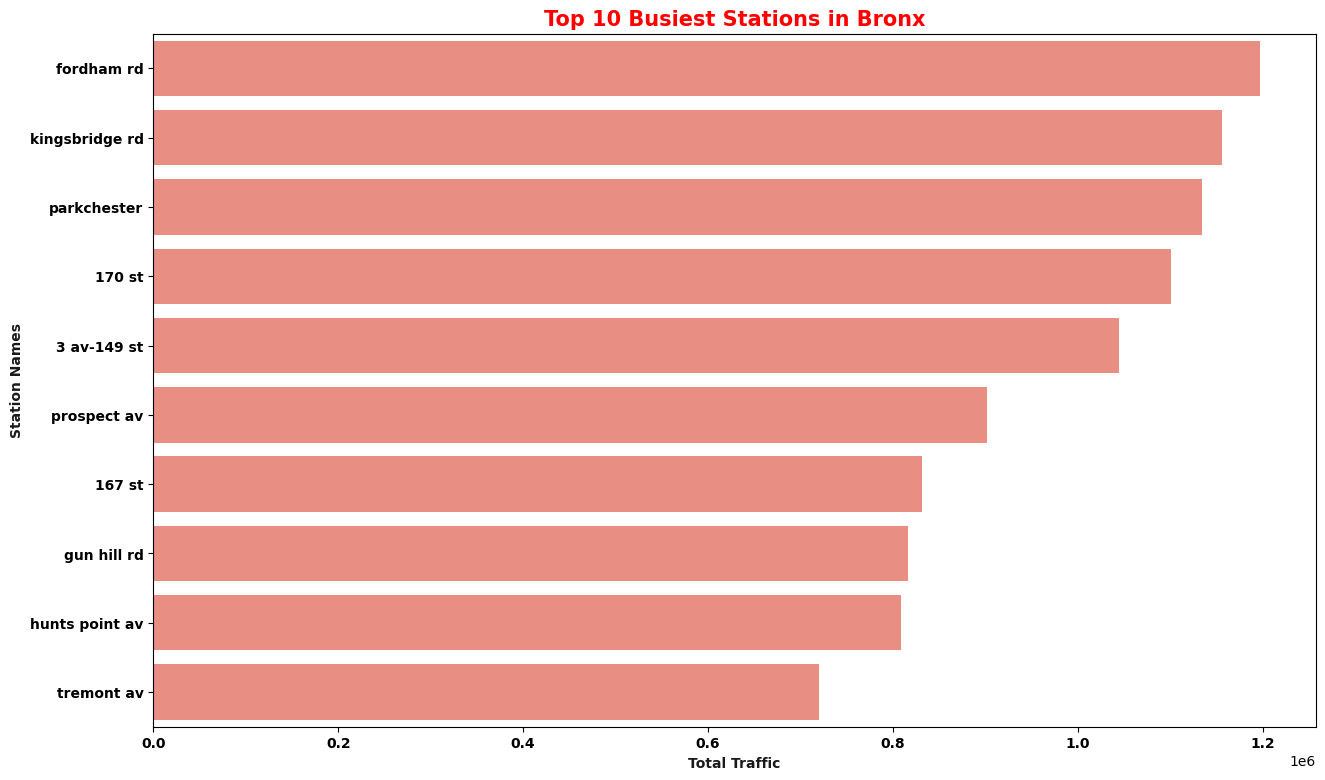

In [120]:


#Barplot for Top 10 Busiest Stations

plt.figure(figsize=(15,9)),
plt.style.use('default')
ax = sns.barplot(x="traffic", y="station", data=mta_top10_Bronx,  color="salmon")
plt.title("Top 10 Busiest Stations in Bronx", weight="bold", c="red", fontsize=15)
plt.ylabel("Station Names",weight="bold",c="k")
plt.yticks(rotation=0, weight="bold")
plt.xlabel("Total Traffic",weight= "bold",c="k")
# plt.ylim(0,30000000)
plt.xticks(weight="bold")
# plt.savefig('images/01_Top7BusiesStationsBarPlot.png', dpi=200)
plt.show()



In [67]:
# Finding overall busiest day based on traffic

mta_busiest_day_Bronx = merge_mta_Bronx_entries_exits.groupby("nameofday").sum().sort_values("traffic",ascending=False)
mta_busiest_day_Bronx = mta_busiest_day_Bronx.reset_index()
mta_busiest_day_Bronx

,nameofday,entries,exits,traffic
0,Wednesday,2461552,2065658,3886979
1,Tuesday,2372815,2007421,3831878
2,Monday,945506271,1823508249,3785470
3,Friday,2632444,1934229,3690826
4,Thursday,2296542,1921756,3678952
5,Saturday,1265507,1227477,2365777
6,Sunday,934794,947408,1879384


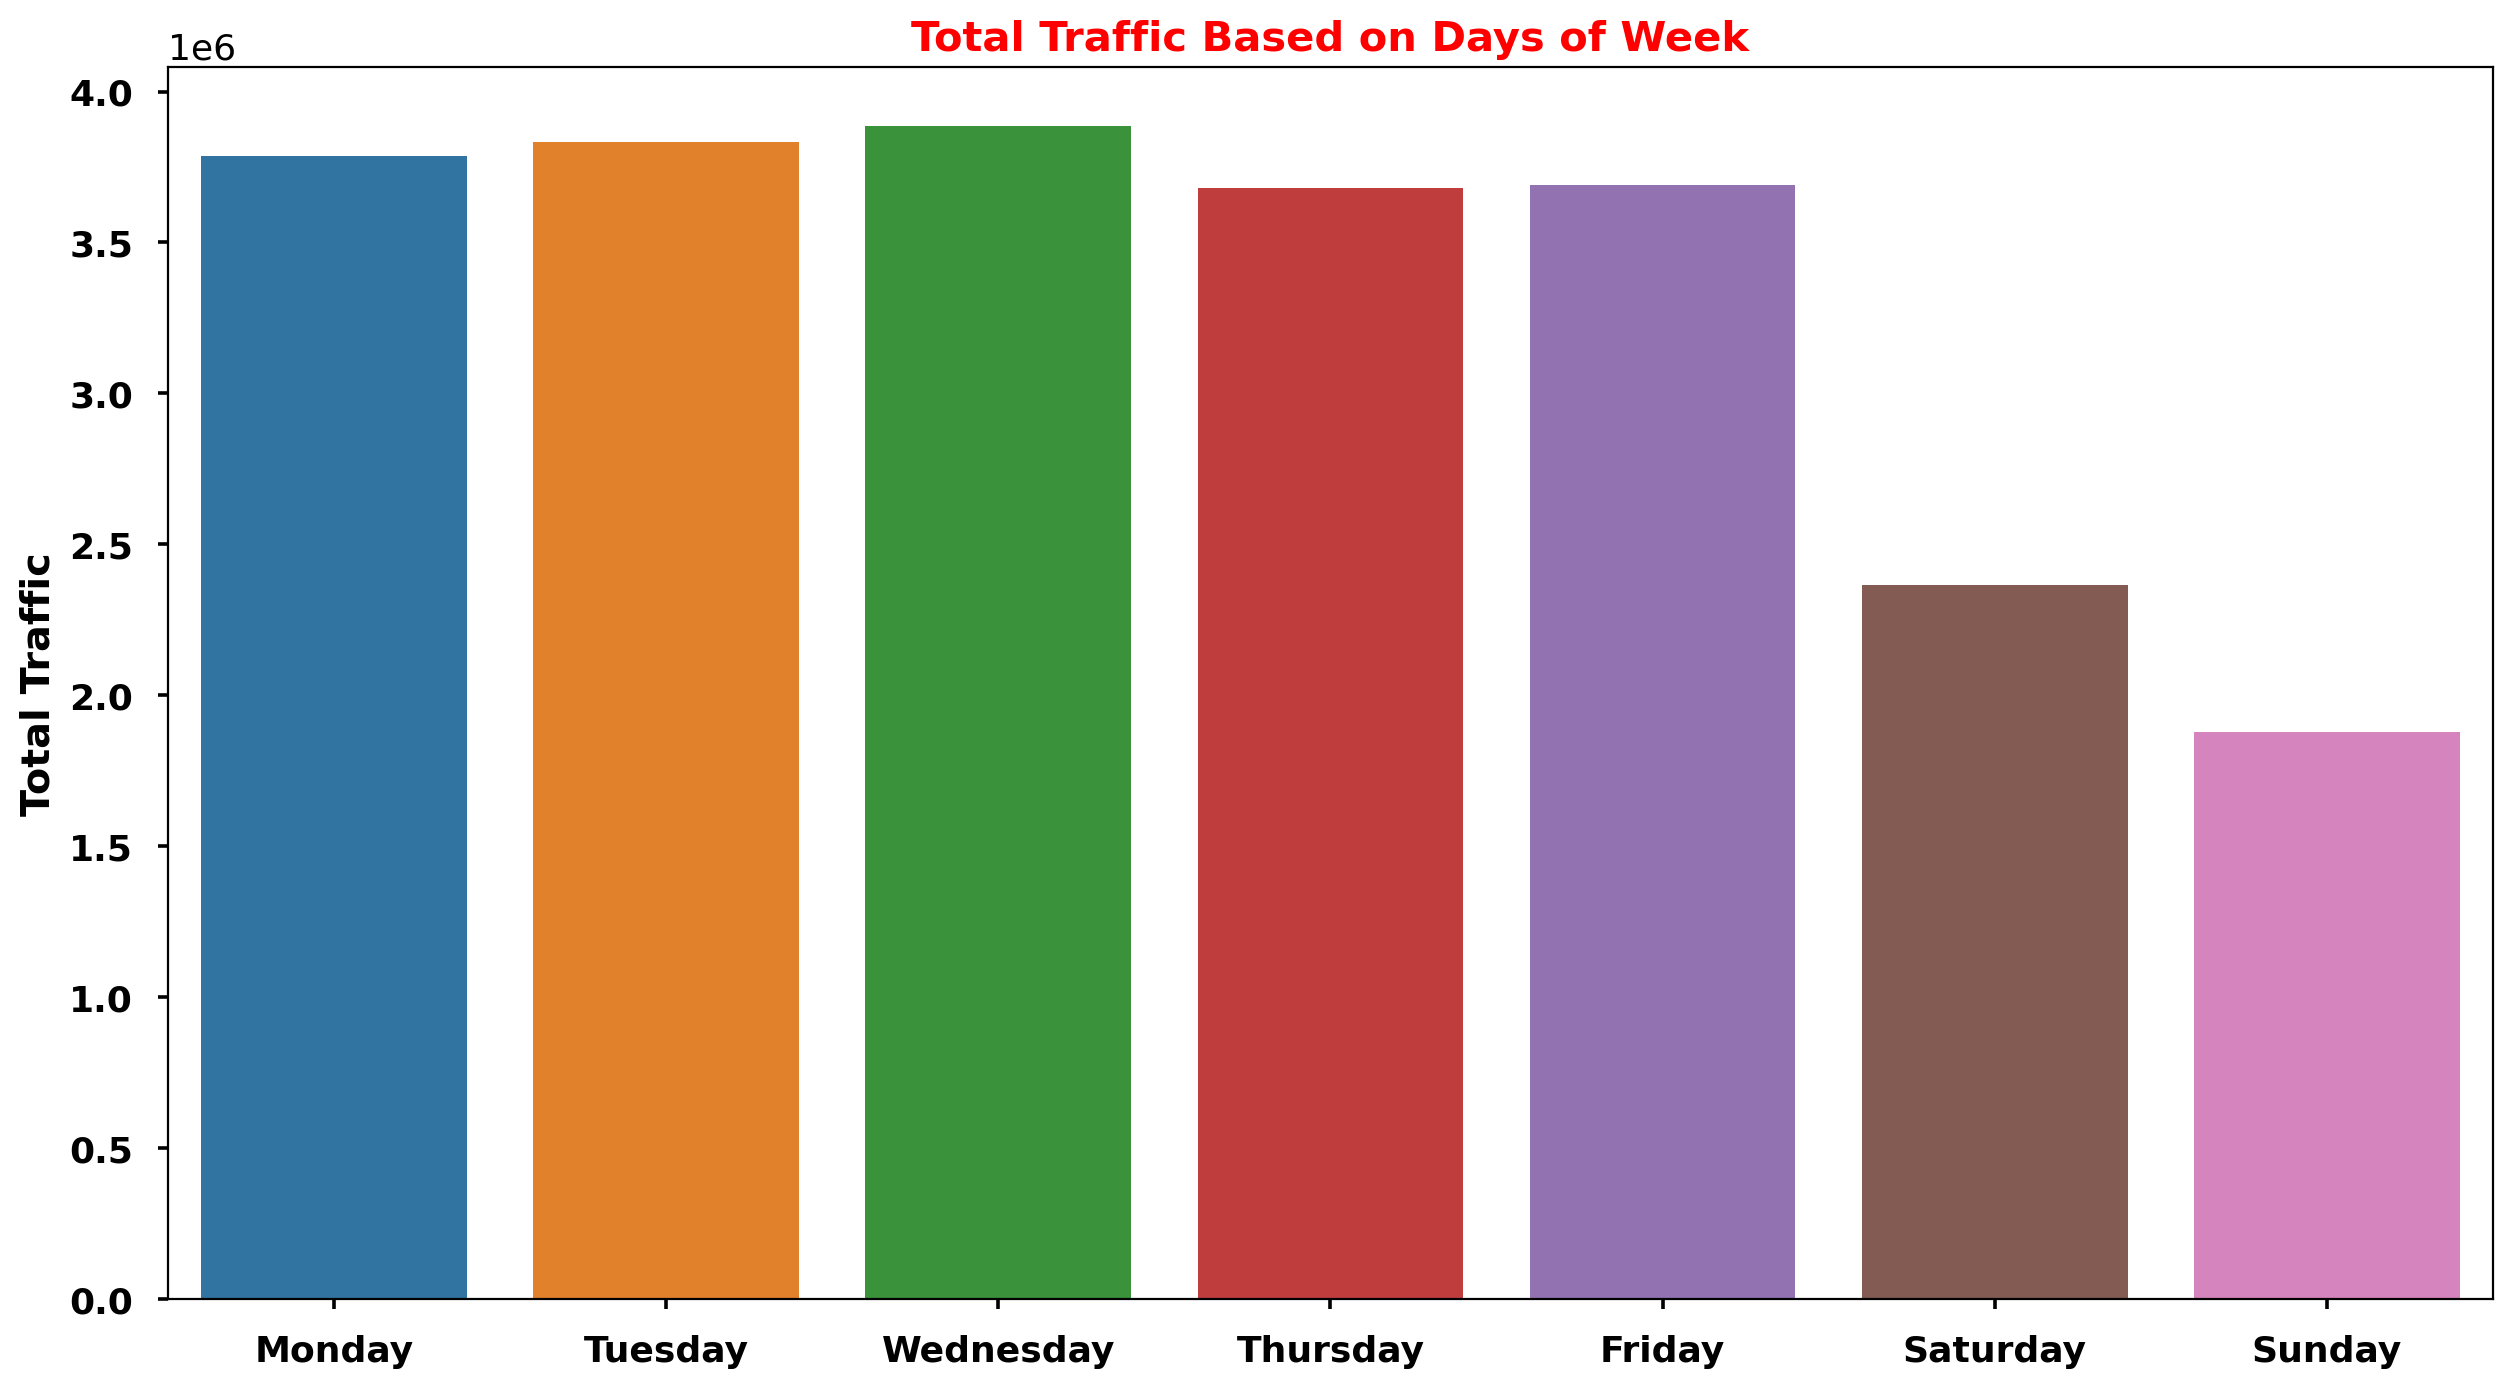

In [72]:
#Barplot for total traffic
plt.figure(figsize=(15,8),dpi=200),
plt.style.use('seaborn-talk')

ax = sns.barplot(x="nameofday",y="traffic",data=mta_busiest_day_Bronx, order=["Monday","Tuesday","Wednesday","Thursday",
                                                                       "Friday","Saturday","Sunday"])

plt.title("Total Traffic Based on Days of Week", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
# plt.ylim(0,200000000)
# plt.savefig('images/02_TotalTrafficPerDayBarPlot.png', dpi=200)
plt.show()



In [77]:
mta_top10_Bronx_list = mta_top10_Bronx["station"]
mta_top10_Bronx_list

0        fordham rd
1    kingsbridge rd
2       parkchester
3            170 st
4       3 av-149 st
5       prospect av
6            167 st
7       gun hill rd
8    hunts point av
9        tremont av
Name: station, dtype: object

In [100]:
#Daily Usage for Top 10 stations in Bronx:
mta_top10_Bronx_daily = merge_mta_Bronx_entries_exits.groupby(["station","nameofday"]).sum()

mta_top10_Bronx_daily = mta_top10_Bronx_daily.reset_index()

mta_top10_Bronx_daily= mta_top10_Bronx_daily[(mta_top10_Bronx_daily["station"]=="fordham rd") 
                  | (mta_top10_Bronx_daily["station"]=="kingsbridge rd")
                  | (mta_top10_Bronx_daily["station"]=='parkchester')
                  | (mta_top10_Bronx_daily["station"]=='170 st')
                  | (mta_top10_Bronx_daily["station"]=="3 av-149 st")
                  | (mta_top10_Bronx_daily["station"]=="167 st")
                  | (mta_top10_Bronx_daily["station"]=="gun hill rd")
                  | (mta_top10_Bronx_daily["station"]=="hunts point av")
                  | (mta_top10_Bronx_daily["station"]=="tremont av")
                  | (mta_top10_Bronx_daily["station"]=="prospect av")]


mta_top10_Bronx_daily = mta_top10_Bronx_daily.reset_index()

mta_top10_Bronx_daily.head(10)



,index,station,nameofday,entries,exits,traffic
0,0,167 st,Friday,122031,112554,118592
1,1,167 st,Monday,121949,115434,120881
2,2,167 st,Saturday,73010,72455,128576
3,3,167 st,Sunday,57073,59402,113657
4,4,167 st,Thursday,121478,113771,116884
5,5,167 st,Tuesday,124822,117857,118325
6,6,167 st,Wednesday,129428,121303,114400
7,7,170 st,Friday,95990,97804,175752
8,8,170 st,Monday,96510,99371,174507
9,9,170 st,Saturday,53589,61370,114959


In [102]:
#mta_top7_daily_order = mta_top7_daily.reindex(index = [1,5,6,4,0,2,3,8,12,13,11,7,9,10,15,19,20,18,14,16,17,22,26,27,25,21,23,24,29,33,34,32,28,30,31,36,40,41,39,35,37,38,43,47,48,46,42,44,45])
mta_top10_Bronx_daily_order = mta_top10_Bronx_daily.reindex(index = range(0,49))
mta_top10_Bronx_daily_order.head(10)



,index,station,nameofday,entries,exits,traffic
0,0,167 st,Friday,122031,112554,118592
1,1,167 st,Monday,121949,115434,120881
2,2,167 st,Saturday,73010,72455,128576
3,3,167 st,Sunday,57073,59402,113657
4,4,167 st,Thursday,121478,113771,116884
5,5,167 st,Tuesday,124822,117857,118325
6,6,167 st,Wednesday,129428,121303,114400
7,7,170 st,Friday,95990,97804,175752
8,8,170 st,Monday,96510,99371,174507
9,9,170 st,Saturday,53589,61370,114959


In [109]:
#Creating Pivot table for heatmap

mta_top10_Bronx_heatmap = mta_top10_Bronx_daily.groupby(["station","nameofday"]).traffic.mean().reset_index()

mta_top10_Bronx_heatmap = mta_top10_Bronx_heatmap.pivot("nameofday","station","traffic")

mta_top10_Bronx_heatmap = mta_top10_Bronx_heatmap.reindex(index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

mta_top10_Bronx_heatmap

station,167 st,170 st,3 av-149 st,fordham rd,gun hill rd,hunts point av,kingsbridge rd,parkchester,prospect av,tremont av
nameofday,,,,,,,,,,
Monday,120881.0,174507.0,169289.0,189027.0,133179.0,139085.0,190098.0,195091.0,148146.0,117743.0
Tuesday,118325.0,179309.0,164597.0,190603.0,136356.0,137558.0,195185.0,188508.0,153493.0,121176.0
Wednesday,114400.0,187979.0,156324.0,195604.0,133331.0,139724.0,201042.0,175560.0,158461.0,124267.0
Thursday,116884.0,175940.0,159718.0,187274.0,127879.0,125826.0,187310.0,176486.0,146602.0,115662.0
Friday,118592.0,175752.0,161260.0,184402.0,129892.0,131304.0,184932.0,178510.0,147182.0,114846.0
Saturday,128576.0,114959.0,132637.0,139249.0,87286.0,76517.0,108129.0,124466.0,81827.0,70323.0
Sunday,113657.0,92309.0,100699.0,111382.0,68533.0,59248.0,88755.0,95773.0,66480.0,56384.0


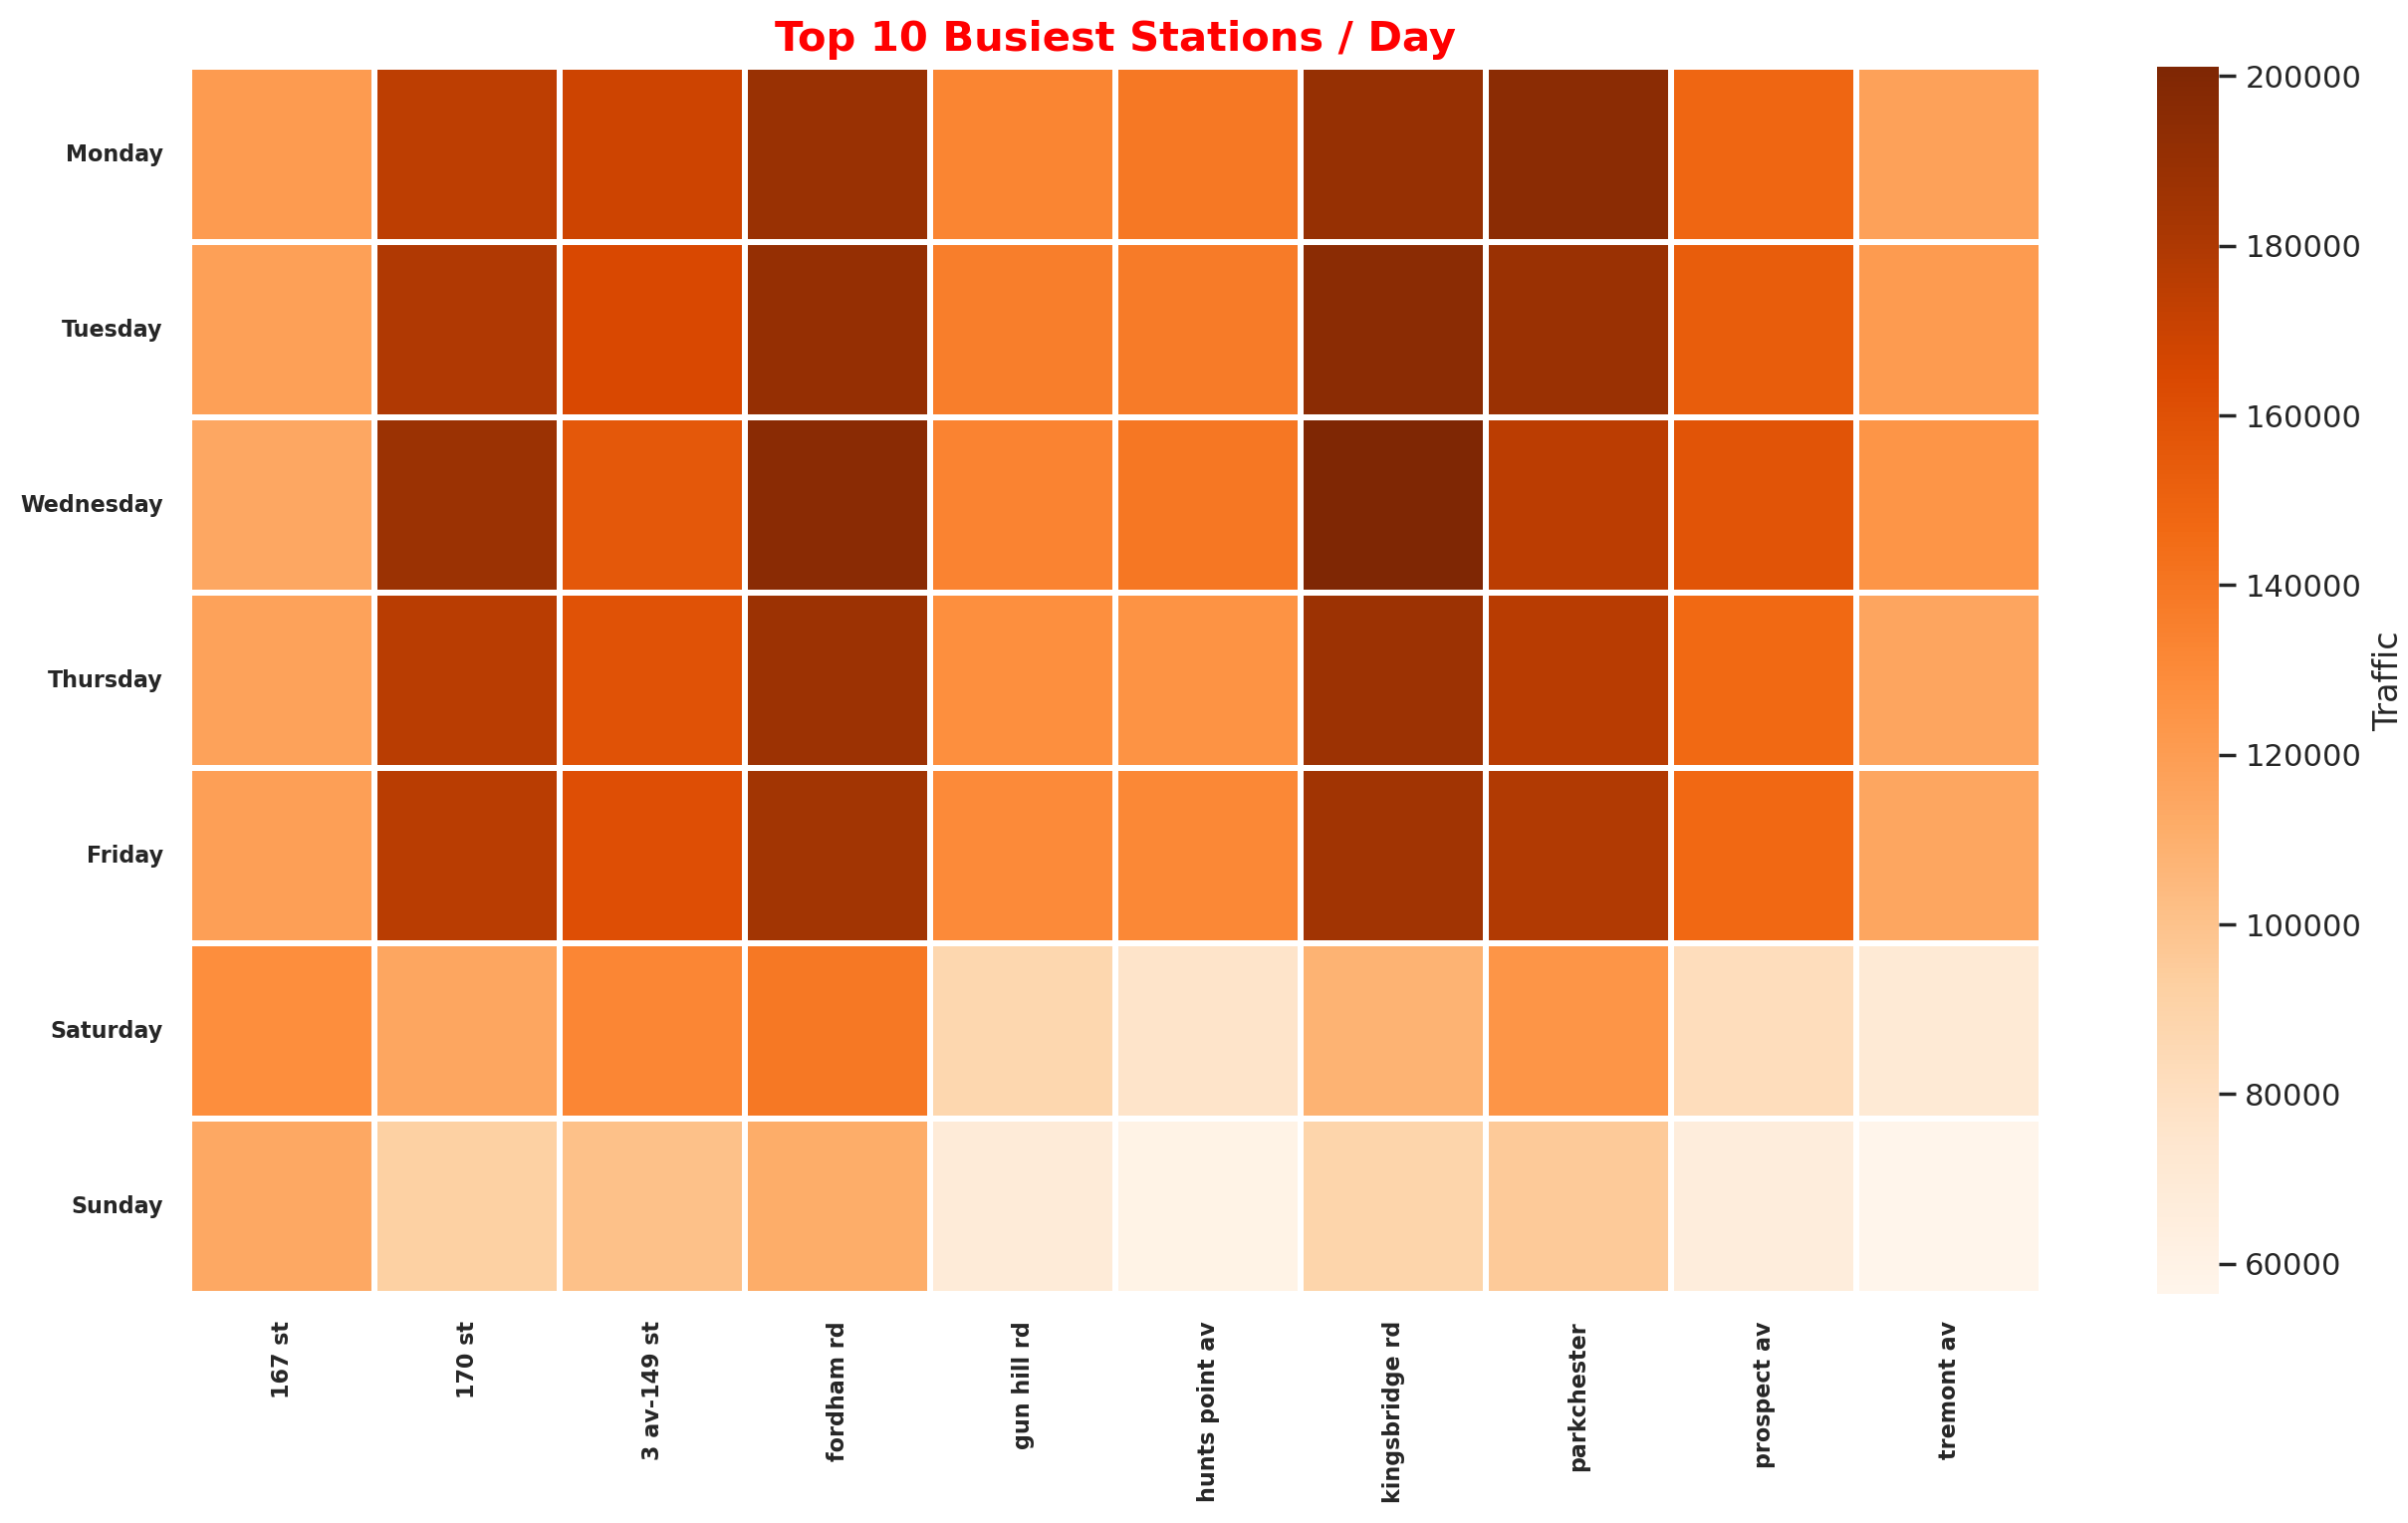

In [112]:
#Heatmap for top7 stations per day

plt.figure(figsize=(15,8)),
sns.set(font_scale=1)
sns.heatmap(mta_top10_Bronx_heatmap,annot=False, linewidths=2, cmap="Oranges",cbar_kws={'label': 'Traffic'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=8)
plt.xticks(weight="bold",rotation=90,size=8)
plt.title("Top 10 Busiest Stations / Day",weight="bold",c="red", fontsize=15)
# plt.savefig('images/04_Top7BusiesStationsPerDayHeatmap.png', dpi=200)
plt.show()

## Working with Brooklyn Dataframe:

In [54]:
# Adding "TURNSTILE" columns that concatenate 'C/A', 'UNIT', 'SCP'

merge_mta_Brooklyn["turnstile"] = merge_mta_Brooklyn["c_a"]+"-"+merge_mta_Brooklyn["unit"]+"-"+merge_mta_Brooklyn["scp"]

merge_mta_Brooklyn.head(10)

,c_a,unit,scp,station,linename,division_x,date,time,desc,entries,exits,date_time,borough,turnstile
0,R641,R210,00-06-00,beverly rd,25,IRT,12/24/2021,23:00:00,REGULAR,67456073,17298082,2021-12-24 23:00:00,Bk,R641-R210-00-06-00
1,R641,R210,00-06-00,beverly rd,25,IRT,12/24/2021,19:00:00,REGULAR,67456065,17298050,2021-12-24 19:00:00,Bk,R641-R210-00-06-00
2,R641,R210,00-06-00,beverly rd,25,IRT,12/24/2021,15:00:00,REGULAR,67456030,17297992,2021-12-24 15:00:00,Bk,R641-R210-00-06-00
3,R641,R210,00-06-00,beverly rd,25,IRT,12/24/2021,11:00:00,REGULAR,67455995,17297967,2021-12-24 11:00:00,Bk,R641-R210-00-06-00
4,R641,R210,00-06-00,beverly rd,25,IRT,12/24/2021,07:00:00,REGULAR,67455964,17297950,2021-12-24 07:00:00,Bk,R641-R210-00-06-00
5,R641,R210,00-06-00,beverly rd,25,IRT,12/24/2021,03:00:00,REGULAR,67455962,17297946,2021-12-24 03:00:00,Bk,R641-R210-00-06-00
6,R641,R210,00-06-00,beverly rd,25,IRT,12/23/2021,23:00:00,REGULAR,67455961,17297934,2021-12-23 23:00:00,Bk,R641-R210-00-06-00
7,R641,R210,00-06-00,beverly rd,25,IRT,12/23/2021,19:00:00,REGULAR,67455952,17297893,2021-12-23 19:00:00,Bk,R641-R210-00-06-00
8,R641,R210,00-06-00,beverly rd,25,IRT,12/23/2021,15:00:00,REGULAR,67455918,17297814,2021-12-23 15:00:00,Bk,R641-R210-00-06-00
9,R641,R210,00-06-00,beverly rd,25,IRT,12/23/2021,11:00:00,REGULAR,67455870,17297779,2021-12-23 11:00:00,Bk,R641-R210-00-06-00


In [55]:
#Create a column that called "NAMEOFDAY"
merge_mta_Brooklyn["nameofday"]= merge_mta_Brooklyn["date_time"].dt.day_name()

#Checking sample 5 rows
merge_mta_Brooklyn.sample(5)

,c_a,unit,scp,station,linename,division_x,date,time,desc,entries,exits,date_time,borough,turnstile,nameofday
360148,N098,R028,00-07-00,fulton st,2345ACJZ,IND,11/25/2021,10:00:00,REGULAR,36944,70747,2021-11-25 10:00:00,Bk,N098-R028-00-07-00,Thursday
218871,C015,R246,01-00-02,prospect av,R,BMT,10/11/2021,20:00:00,REGULAR,3874025,8345119,2021-10-11 20:00:00,Bk,C015-R246-01-00-02,Monday
707749,J016,R381,00-00-02,halsey st,J,BMT,09/28/2021,09:00:00,REGULAR,19228149,6179297,2021-09-28 09:00:00,Bk,J016-R381-00-00-02,Tuesday
553910,D008,R392,00-06-01,18 av,N,BMT,12/07/2021,20:00:00,REGULAR,1435395,519090,2021-12-07 20:00:00,Bk,D008-R392-00-06-01,Tuesday
121290,N116,R198,00-03-01,nostrand av,AC,IND,09/25/2021,04:00:00,REGULAR,8184116,4433030,2021-09-25 04:00:00,Bk,N116-R198-00-03-01,Saturday


In [56]:
#Checking Unique TURNSTILE count

len(merge_mta_Brooklyn["turnstile"].unique())

1179

In [57]:
#Finding Daily traffic(entries+exits) based on turnstile

merge_mta_Brooklyn_entries = merge_mta_Brooklyn.groupby(["station","turnstile","date","nameofday"]).entries.max() - merge_mta_Brooklyn.groupby(["station","turnstile","date","nameofday"]).entries.min()

merge_mta_Brooklyn_exits = merge_mta_Brooklyn.groupby(["station","turnstile","date","nameofday"]).exits.max() - merge_mta_Brooklyn.groupby(["station","turnstile","date","nameofday"]).exits.min()

merge_mta_Brooklyn_entries = merge_mta_Brooklyn_entries.reset_index()

merge_mta_Brooklyn_exits = merge_mta_Brooklyn_exits.reset_index()

merge_mta_Brooklyn_entries_exits = pd.merge(merge_mta_Brooklyn_entries, merge_mta_Brooklyn_exits, how="outer")

merge_mta_Brooklyn_entries_exits["traffic"] = merge_mta_Brooklyn_entries_exits["entries"] + merge_mta_Brooklyn_entries_exits["exits"]

merge_mta_Brooklyn_entries_exits.sample(10)


,station,turnstile,date,nameofday,entries,exits,traffic
85946,marcy av,J002-R460-00-00-00,09/28/2021,Tuesday,185,71,256
4243,36 st,N312-R339-00-00-02,11/20/2021,Saturday,140,109,249
46225,borough hall,R604-R108-03-00-03,10/24/2021,Sunday,71,7,78
27621,86 st,R250-R179-00-00-05,11/13/2021,Saturday,291,54,345
103506,union st,C010-R231-00-00-02,10/29/2021,Friday,768,509,1277
69115,fulton st,R205A-R014-04-02-03,10/14/2021,Thursday,582,36,618
29455,avenue h,B020-R263-00-00-00,11/29/2021,Monday,265,345,610
13249,59 st,R244A-R050-01-06-01,11/17/2021,Wednesday,131,130,261
33151,avenue m,B022-R229-00-00-04,11/04/2021,Thursday,806,317,1123
25682,86 st,R165-R167-01-00-04,10/16/2021,Saturday,526,2049,2575


In [58]:
merge_mta_Brooklyn_entries_exits["traffic"].quantile(0.95)

2233.5

In [65]:
# sns.set_style('whitegrid')
# ax = sns.distplot(merge_mta_Brooklyn_entries_exits['traffic'],color ='blue');

In [66]:
mmbr_traffic_under_percentileX =merge_mta_Brooklyn_entries_exits[merge_mta_Brooklyn_entries_exits["traffic"]<(merge_mta_Brooklyn_entries_exits.traffic.quantile(0.95))]
# ax=sns.distplot(mmbr_traffic_under_percentileX["traffic"])

In [61]:
#Setting median values to giant values
merge_mta_Brooklyn_entries_exits["traffic"][merge_mta_Brooklyn_entries_exits["traffic"] > (merge_mta_Brooklyn_entries_exits.traffic.quantile(0.95))] = merge_mta_Brooklyn_entries_exits["traffic"].median()

/var/folders/p5/5cz9q1c15pn6hbl2m1csrmjh0000gn/T/ipykernel_2689/3383647895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_mta_Brooklyn_entries_exits["traffic"][merge_mta_Brooklyn_entries_exits["traffic"] > (merge_mta_Brooklyn_entries_exits.traffic.quantile(0.95))] = merge_mta_Brooklyn_entries_exits["traffic"].median()


In [62]:
merge_mta_Brooklyn_entries_exits.sort_values("traffic", ascending=False).head(10)

,station,turnstile,date,nameofday,entries,exits,traffic
21374,8 av,H001-R175-00-00-01,12/15/2021,Wednesday,1110,1123,2233
5736,50 st,N056-R188-01-00-03,09/27/2021,Monday,734,1499,2233
103037,sterling st,R636-R209-00-00-02,10/15/2021,Friday,1134,1099,2233
14597,7 av,B004-R171-00-00-00,11/02/2021,Tuesday,1088,1145,2233
41124,bedford av,H010-R235-01-00-01,10/16/2021,Saturday,246,1987,2233
72745,grand st,N520-R240-00-00-02,10/04/2021,Monday,1237,996,2233
69597,fulton st,R206-R014-02-00-00,11/10/2021,Wednesday,282,1951,2233
15908,7 av,N539-R288-00-00-00,12/09/2021,Thursday,1671,562,2233
18604,77 st,R248-R178-00-00-07,11/05/2021,Friday,1681,552,2233
53531,church av,R639-R109-00-00-03,11/19/2021,Friday,1932,301,2233


In [63]:
# Finding top 10 busiest stations in Brooklyn Borough based on traffic

mta_top10_Brooklyn= merge_mta_Brooklyn_entries_exits.groupby("station").sum().sort_values("traffic",ascending=False).head(10)
mta_top10_Brooklyn = mta_top10_Brooklyn.reset_index()
mta_top10_Brooklyn

,station,entries,exits,traffic
0,fulton st,3682099593,1677829608,5558484
1,86 st,3088134,4180235,5007012
2,59 st,3001585,3395032,4439598
3,50 st,1446739,1870788,2804130
4,church av,1425927,1245374,2622205
5,7 av,1135028,1503175,2227619
6,8 av,1996735605,1838147,2176534
7,kings hwy,1554688,1254667,2081981
8,77 st,1101831,1426563,2037261
9,dekalb av,1147710,812590,1825200


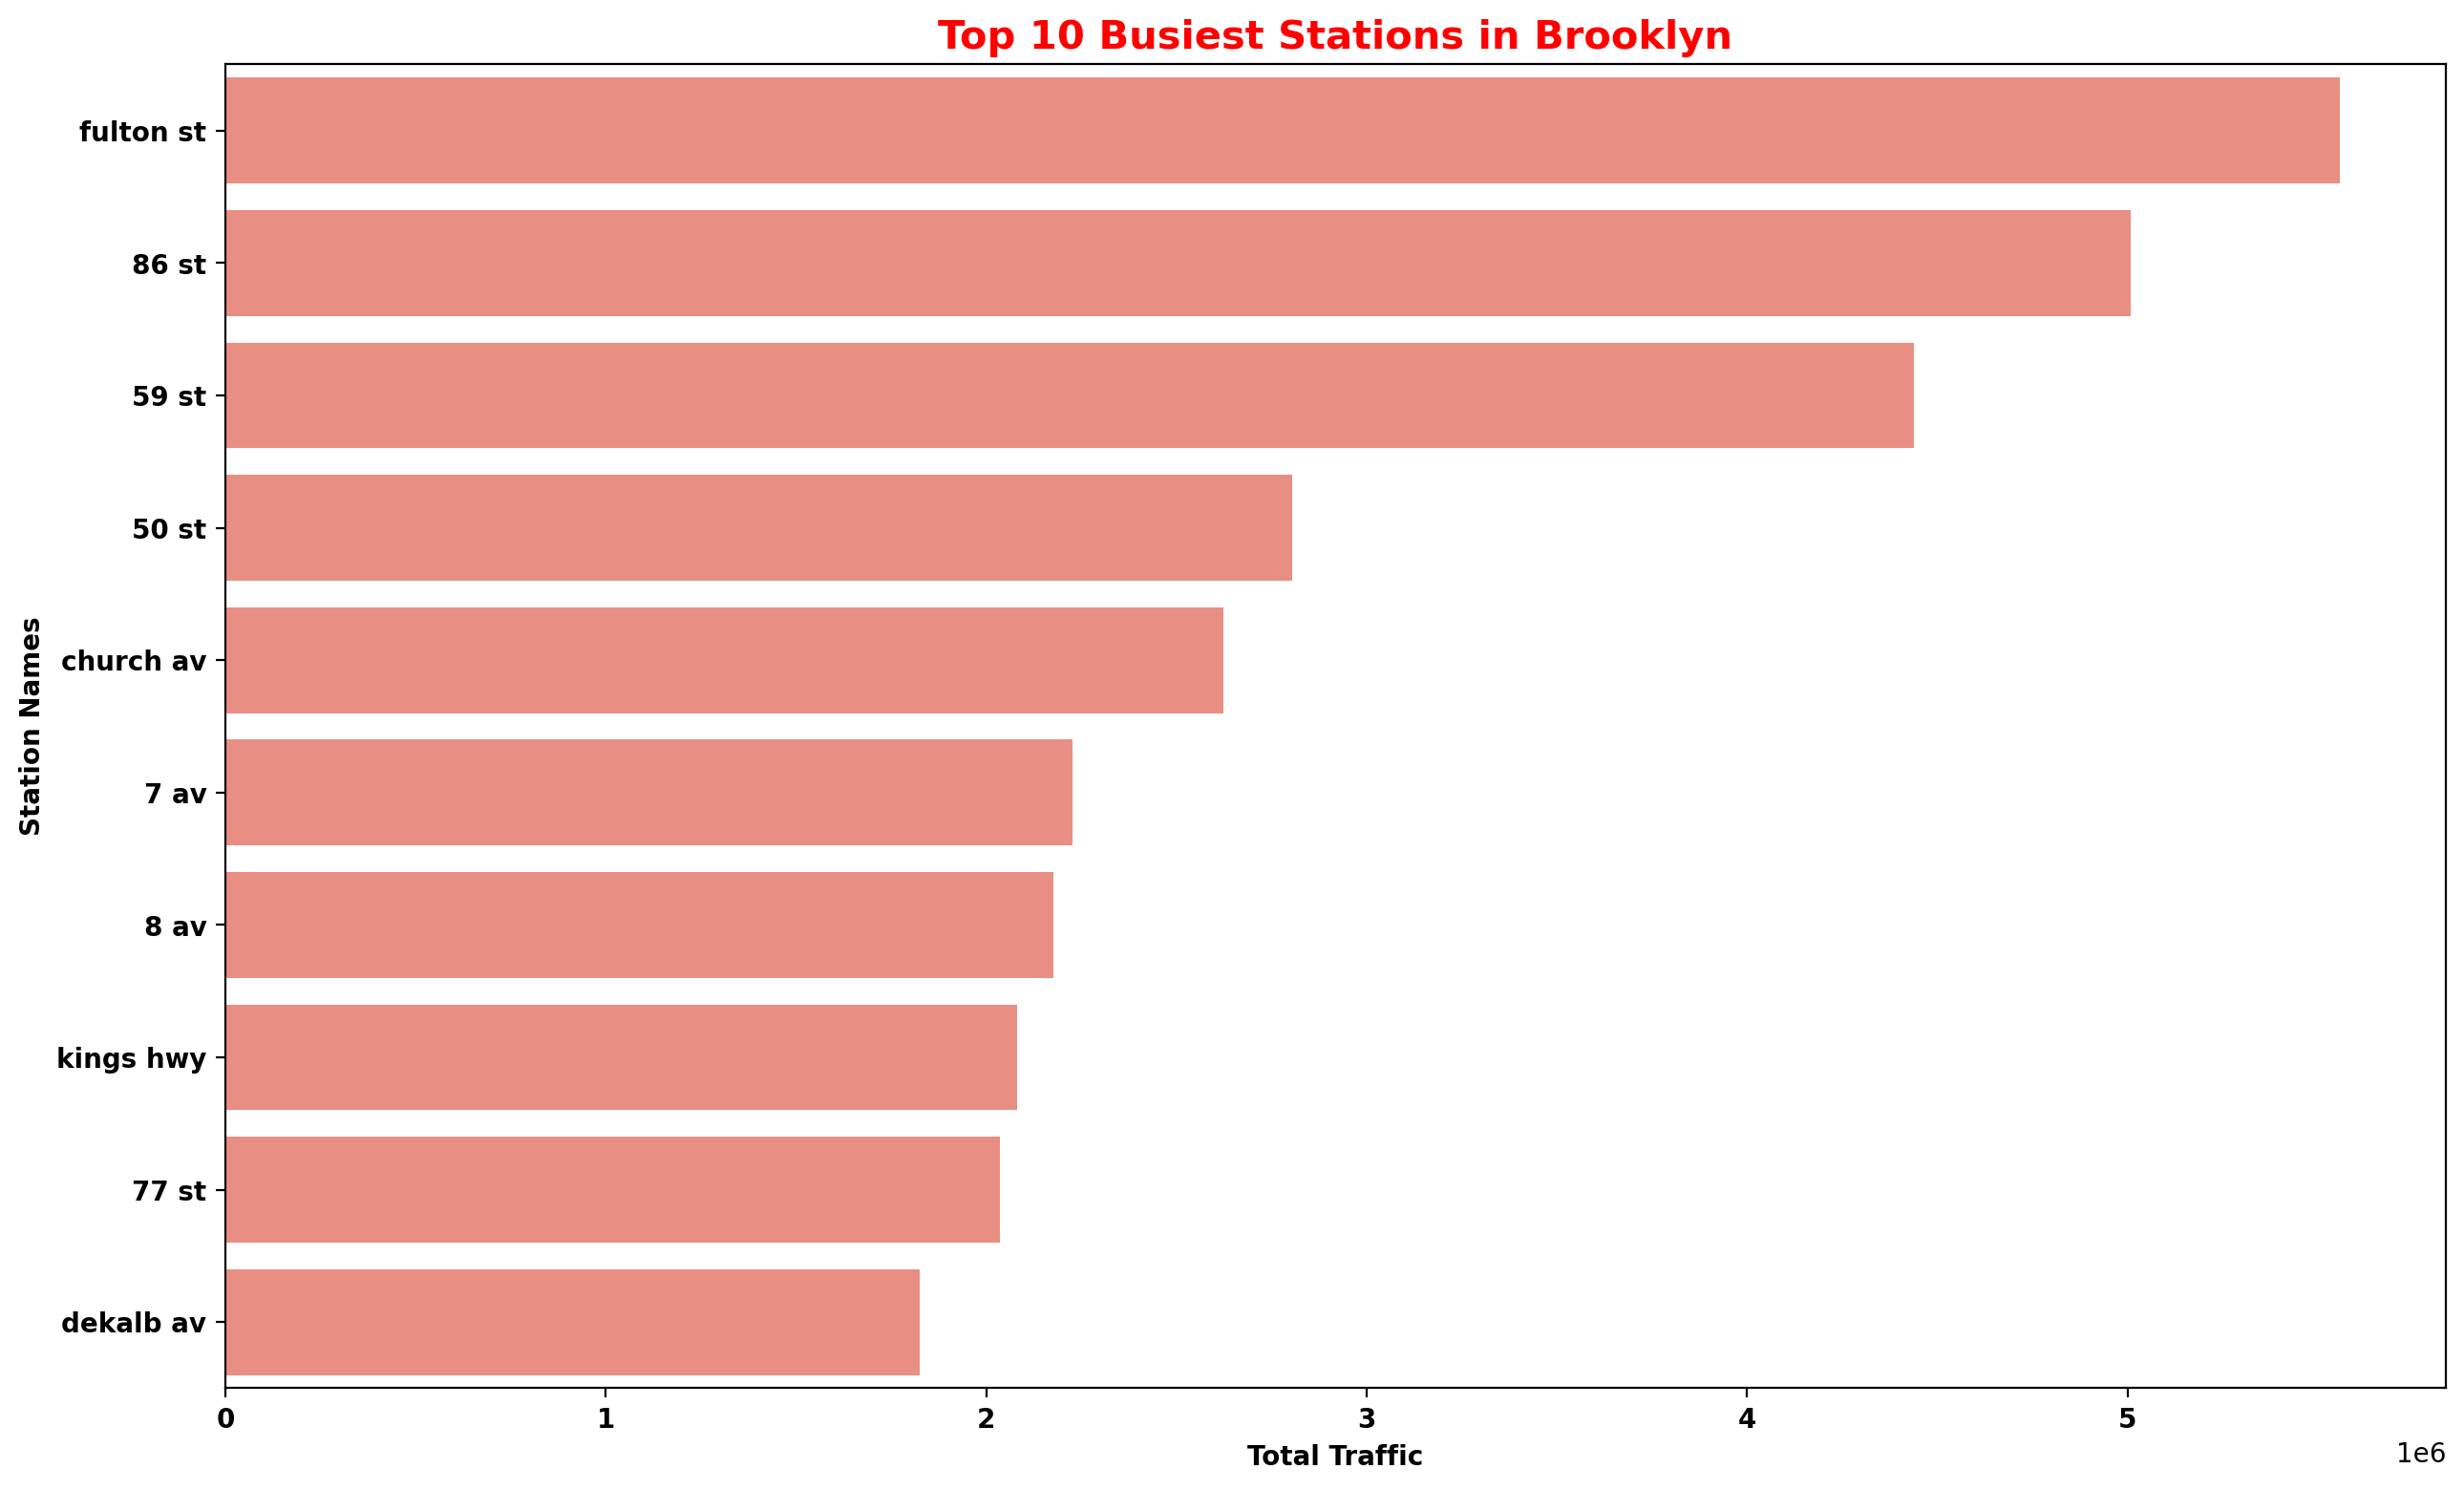

In [64]:


#Barplot for Top 10 busiest stations in Brooklyn Borough

plt.figure(figsize=(15,9)),
plt.style.use('default')
ax = sns.barplot(x="traffic", y="station", data=mta_top10_Brooklyn,  color="salmon")
plt.title("Top 10 Busiest Stations in Brooklyn", weight="bold", c="red", fontsize=15)
plt.ylabel("Station Names",weight="bold",c="k")
plt.yticks(rotation=0, weight="bold")
plt.xlabel("Total Traffic",weight= "bold",c="k")
# plt.ylim(0,30000000)
plt.xticks(weight="bold")
# plt.savefig('images/01_Top7BusiesStationsBarPlot.png', dpi=200)
plt.show()

In [113]:
# Finding overall busiest day based on traffic

mta_busiest_day_Brooklyn = merge_mta_Brooklyn_entries_exits.groupby("nameofday").sum().sort_values("traffic",ascending=False)
mta_busiest_day_Brooklyn = mta_busiest_day_Brooklyn.reset_index()
mta_busiest_day_Brooklyn

,nameofday,entries,exits,traffic
0,Wednesday,3322117888,917313230,13551509
1,Tuesday,8003053,8058864,13350057
2,Monday,17582592,9319136,13113818
3,Thursday,383074943,782671995,12881502
4,Friday,7097676,7680480,12761450
5,Saturday,4361569,5307247,8716867
6,Sunday,2116003165,4823353,7483160


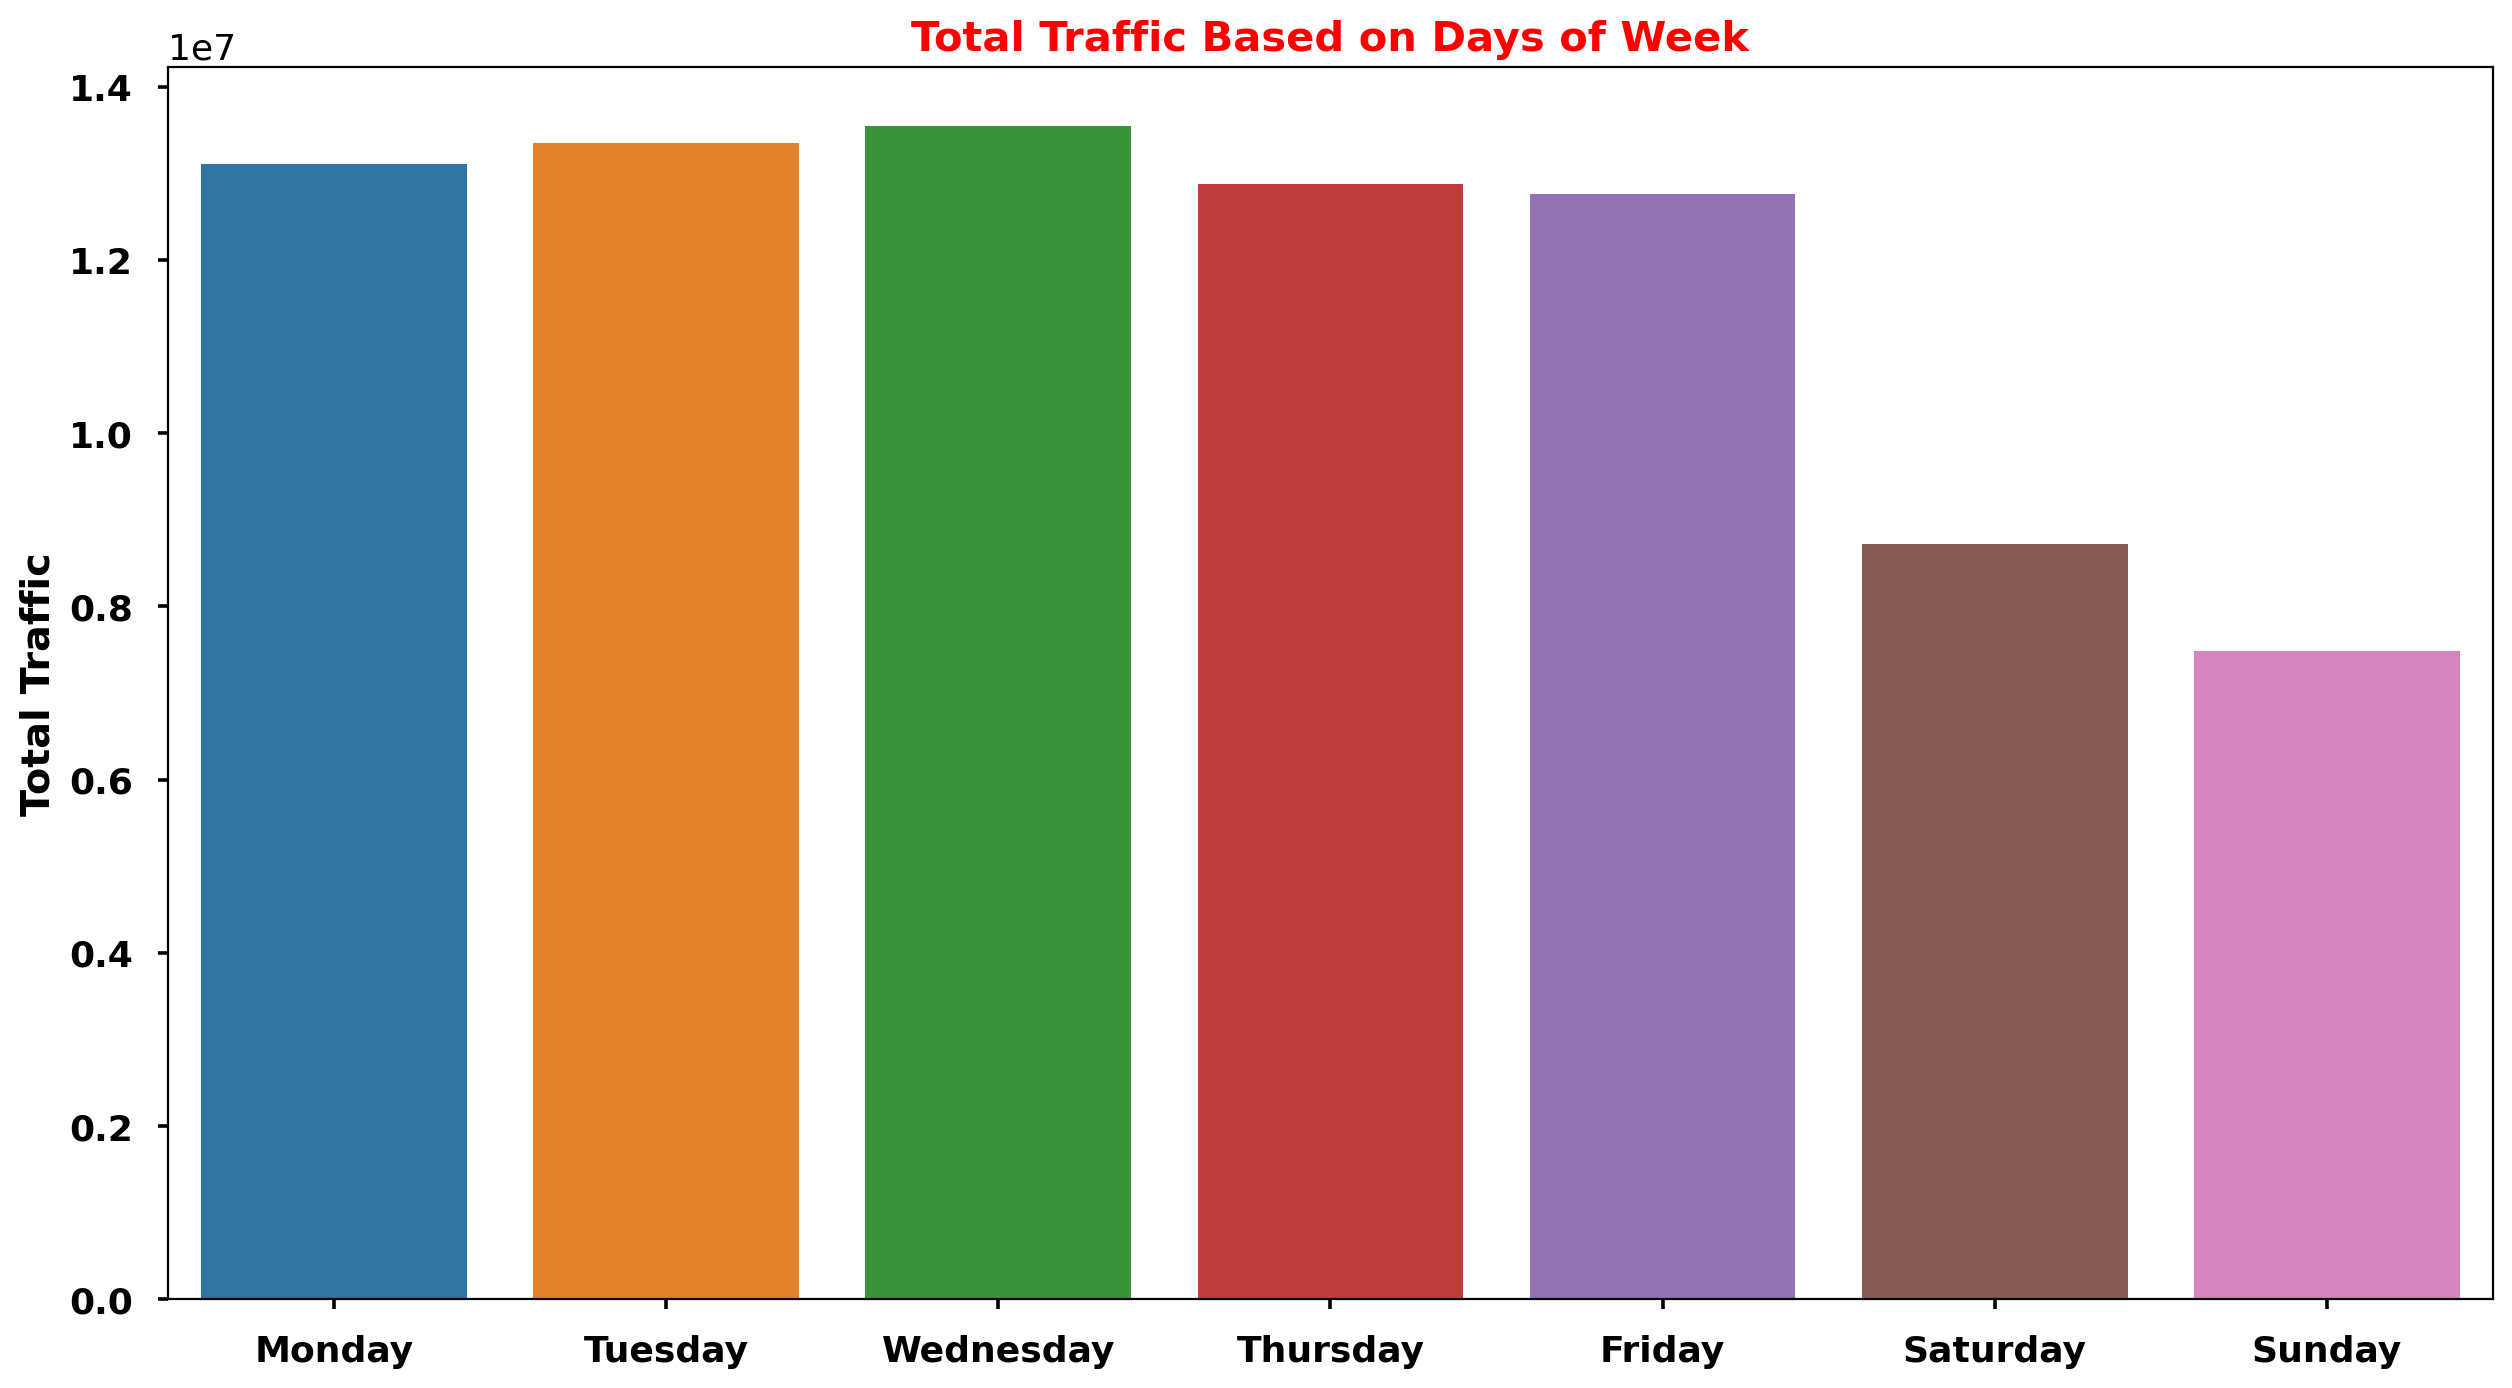

In [114]:
#Barplot for total traffic
plt.figure(figsize=(15,8),dpi=200),
plt.style.use('seaborn-talk')

ax = sns.barplot(x="nameofday",y="traffic",data=mta_busiest_day_Brooklyn, order=["Monday","Tuesday","Wednesday","Thursday",
                                                                       "Friday","Saturday","Sunday"])

plt.title("Total Traffic Based on Days of Week", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
# plt.ylim(0,200000000)
# plt.savefig('images/02_TotalTrafficPerDayBarPlot.png', dpi=200)
plt.show()


In [116]:
mta_top10_Brooklyn_list = mta_top10_Brooklyn["station"]
mta_top10_Brooklyn_list

0    fulton st
1        86 st
2        59 st
3        50 st
4    church av
5         7 av
6         8 av
7    kings hwy
8        77 st
9    dekalb av
Name: station, dtype: object

In [117]:
#Daily Usage for Top 10 stations in Brooklyn:
mta_top10_Brooklyn_daily = merge_mta_Brooklyn_entries_exits.groupby(["station","nameofday"]).sum()

mta_top10_Brooklyn_daily = mta_top10_Brooklyn_daily.reset_index()

mta_top10_Brooklyn_daily= mta_top10_Brooklyn_daily[(mta_top10_Brooklyn_daily["station"]=="fulton st") 
                  | (mta_top10_Brooklyn_daily["station"]=="86 st")
                  | (mta_top10_Brooklyn_daily["station"]=="59 st")
                  | (mta_top10_Brooklyn_daily["station"]=="50 st")
                  | (mta_top10_Brooklyn_daily["station"]=="church av")
                  | (mta_top10_Brooklyn_daily["station"]=="7 av")
                  | (mta_top10_Brooklyn_daily["station"]=="8 av")
                  | (mta_top10_Brooklyn_daily["station"]=="kings hwy")
                  | (mta_top10_Brooklyn_daily["station"]=="77 st")
                  | (mta_top10_Brooklyn_daily["station"]=="dekalb av")]


mta_top10_Brooklyn_daily = mta_top10_Brooklyn_daily.reset_index()

mta_top10_Brooklyn_daily.head(10)

,index,station,nameofday,entries,exits,traffic
0,49,50 st,Friday,220756,286654,412784
1,50,50 st,Monday,219996,268867,413709
2,51,50 st,Saturday,162090,227077,360034
3,52,50 st,Sunday,144036,190804,327390
4,53,50 st,Thursday,229839,295804,423111
5,54,50 st,Tuesday,231197,296201,428617
6,55,50 st,Wednesday,238825,305381,438485
7,70,59 st,Friday,342350,458876,687389
8,71,59 st,Monday,353889,471868,711286
9,72,59 st,Saturday,200030,298230,494768


In [118]:
mta_top10_Brooklyn_heatmap = mta_top10_Brooklyn_daily.groupby(["station","nameofday"]).traffic.mean().reset_index()

mta_top10_Brooklyn_heatmap = mta_top10_Brooklyn_heatmap.pivot("nameofday","station","traffic")

mta_top10_Brooklyn_heatmap = mta_top10_Brooklyn_heatmap.reindex(index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

mta_top10_Brooklyn_heatmap

station,50 st,59 st,7 av,77 st,8 av,86 st,church av,dekalb av,fulton st,kings hwy
nameofday,,,,,,,,,,
Monday,413709.0,711286.0,344197.0,339888.0,336478.0,765244.0,423010.0,296622.0,904554.0,347148.0
Tuesday,428617.0,724846.0,362490.0,336378.0,335451.0,788232.0,432197.0,296456.0,950932.0,339138.0
Wednesday,438485.0,729702.0,364535.0,342096.0,332575.0,777303.0,446840.0,299685.0,967347.0,342261.0
Thursday,423111.0,689160.0,357619.0,319660.0,314020.0,760623.0,422436.0,282861.0,906320.0,337170.0
Friday,412784.0,687389.0,341494.0,320953.0,324634.0,762846.0,415706.0,293559.0,845173.0,352884.0
Saturday,360034.0,494768.0,249936.0,214687.0,281271.0,612926.0,261842.0,194724.0,550688.0,191548.0
Sunday,327390.0,402447.0,207348.0,163599.0,252105.0,539838.0,220174.0,161293.0,433470.0,171832.0


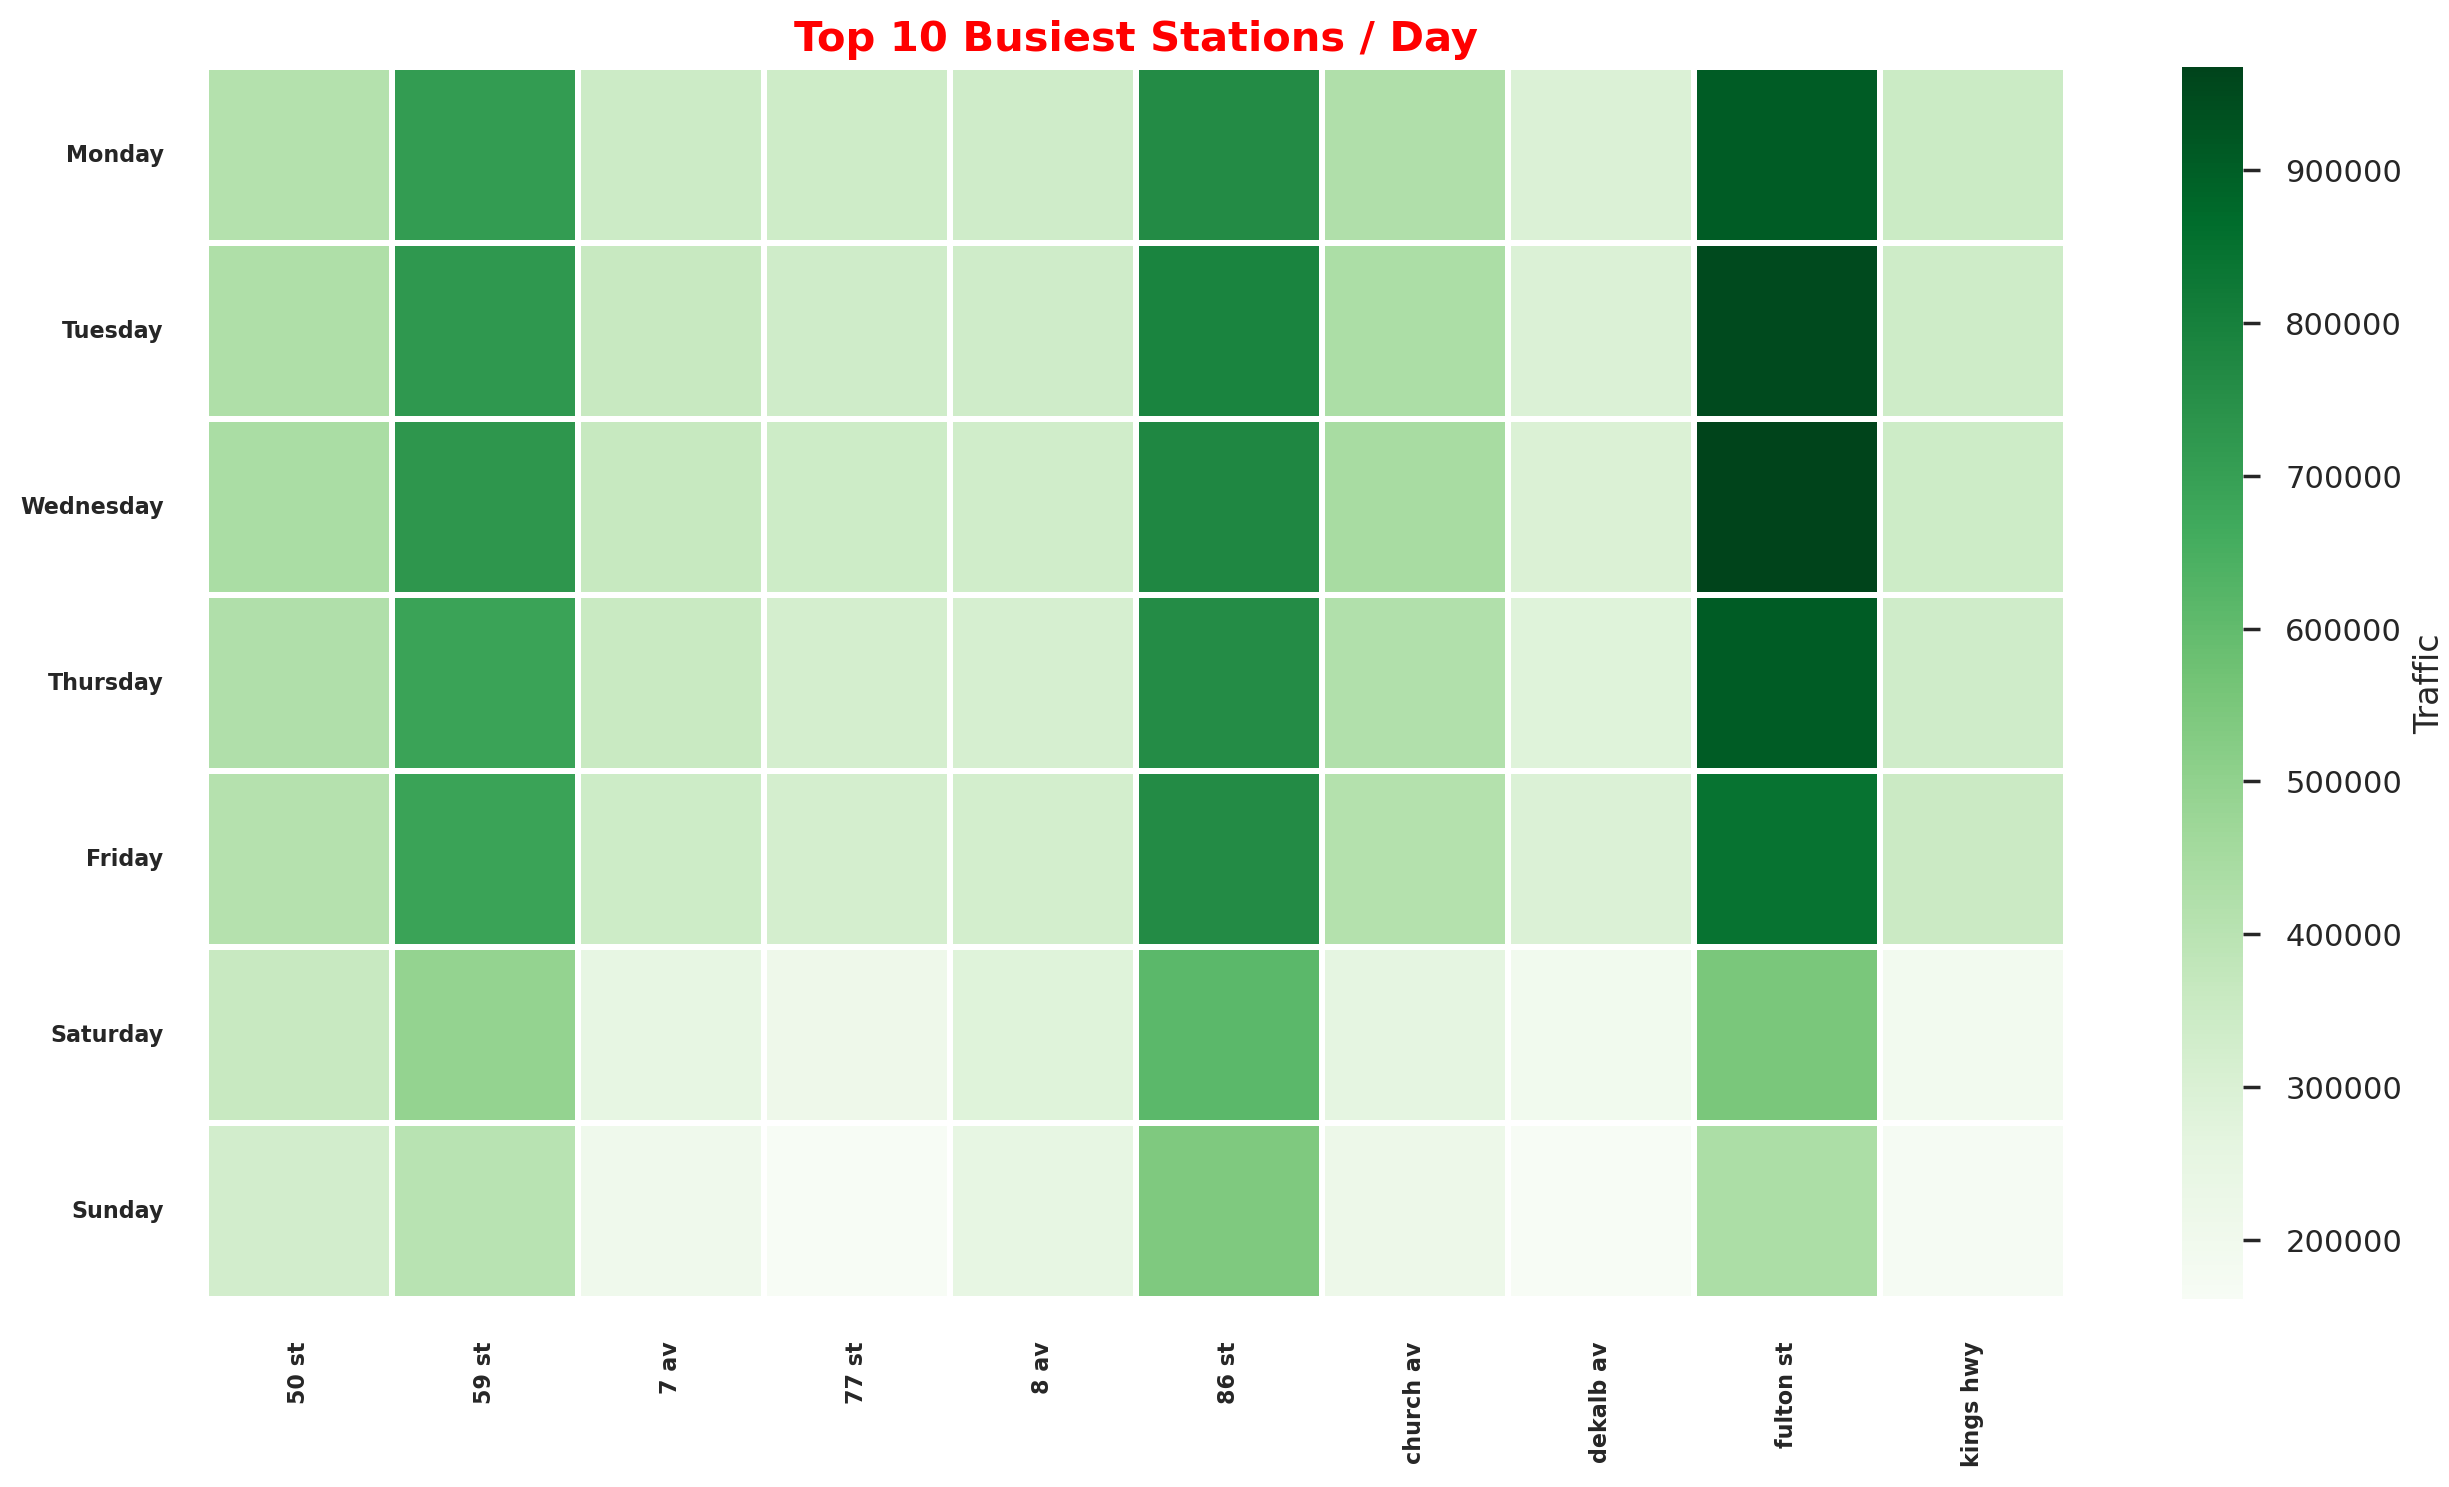

In [119]:
#Heatmap for top7 stations per day

plt.figure(figsize=(15,8)),
sns.set(font_scale=1)
sns.heatmap(mta_top10_Brooklyn_heatmap,annot=False, linewidths=2, cmap="Greens",cbar_kws={'label': 'Traffic'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=8)
plt.xticks(weight="bold",rotation=90,size=8)
plt.title("Top 10 Busiest Stations / Day",weight="bold",c="red", fontsize=15)
# plt.savefig('images/04_Top7BusiesStationsPerDayHeatmap.png', dpi=200)
plt.show()